In [19]:
# Importing all packages needed for the project
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from pyjstat import pyjstat
import matplotlib.ticker as ticker
from matplotlib.image import imread
import sympy as sp

In [20]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13153/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Senger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [21]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [22]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df = pd.concat([nordland_df, troms_finnmark_df])

# Making a copy of the dataset
nord_norge_df= nord_norge_df.copy()

nord_norge_df['year'] = pd.to_datetime(nord_norge_df['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df = nord_norge_df.groupby(nord_norge_df['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df=nord_norge_df.reset_index()

In [23]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KapasitetSeng"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [24]:
# Fixing the dataset so M is replaced with -
df1['year'] =df1['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df1 = df1[df1['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df1 = df1[df1['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df1 = pd.concat([nordland_df1, troms_finnmark_df1])

# Making a copy of the dataset
nord_norge_df1= nord_norge_df1.copy()

nord_norge_df1['year'] = pd.to_datetime(nord_norge_df1['year'], format='%Y-%m')

# Group the dataframe by year and summarize the yearly data and find the mean of the yearly data
nord_norge_df1 = nord_norge_df1.groupby(nord_norge_df1['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df1=nord_norge_df1.reset_index()

In [25]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13152/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc",
          "000"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df_1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [26]:
# Fixing the dataset so M is replaced with -
df_1['måned'] =df_1['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
norge = df_1[df_1['bustadland'] == 'Norge']

# Making a copy of the dataset
norge= norge.copy()

# Taking out the svalbard column and storing it in a new dataset
utlandet = df_1[df_1['bustadland'] == 'Utlandet i alt']

# Making a copy of the dataset
utlandet= utlandet.copy()

# Converting the date to datetime
norge['year'] = pd.to_datetime(norge['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
norge = norge.groupby(norge['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
norge=norge.reset_index()

# Converting the date to datetime
utlandet['year'] = pd.to_datetime(utlandet['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
utlandet = utlandet.groupby(utlandet['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
utlandet=utlandet.reset_index()

# Putting the two datasets together
total = pd.concat([utlandet, norge])

# aggregate the data by year and sum the values
total = total.groupby('year').agg({'value': 'sum'})

# Fixing so the first column is not the index
total=total.reset_index()

In [27]:
# Setting the style for the plots
plt.style.use('seaborn-v0_8-dark')

# Plotting the data
fig, ax = plt.subplots( figsize=(10,7))

# Plotting first bar
ax.bar(nord_norge_df['year'].astype('string'),nord_norge_df['value'], label='Nord-Norge kapasitet', color='#1f77b4')

# Set the title
ax.set_title('Figur 1. Antall hotellsenger og hotellkapasitet.\n Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# Fixing the grid
ax.grid(axis='y')

# Caption
ax.text(5, -1000, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(5.5, 10900, 'Hotellkapasitets %', fontsize=10)
ax.text(-1, 10900, 'Antall ledige senger', fontsize=10)

# Fixing max y value
ax.set_ylim(0, 10630)

# Making a second y-axis
ax2 = ax.twinx()

# Plotting the data for the second y-axis, using astype to make sure the x-axis is a string for not having decimals
ax2.plot(nord_norge_df1['year'].astype('string'),nord_norge_df1['value'],color="midnightblue", label = "Nord-Norge kapasitetutnyttelse", lw=2)

# Setting the y-axis limit for percentage
ax2.set_ylim(0, 100)

#  Fixing the legend together for both y-axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.5, 0.4, 0.5, 0.5), frameon=True)

plt.savefig('figur1.png', dpi=600, bbox_inches='tight')

figur1 = imread('figur1.png')

plt.close()

In [28]:
# Plotting the data
fig, ax1 = plt.subplots( figsize=(10,7))
# Plotting the data
ax1.plot(total['year'].astype("string"), total['value'], color='#1f77b4', linewidth=0.01)
ax1.plot(norge['year'].astype("string"), norge['value'], color='midnightblue', linewidth=0.01)

# Source
ax1.text(x=4.5, y=-500000, s='Kilde: Statistics Norway.', fontsize=10)

# Fixing the y-axis so that it is not in scientific notation
ax1.ticklabel_format(axis='y', style='plain')

#Fixing so it goes from 0 to 5 million
ax1.set_ylim(0, 5000000)

# Set the title
ax1.set_title('Figur 2. Overnattinger på hotell, innenlands og utenlandsk.\n Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# Setting grid
ax1.grid(axis='y', alpha=0.7)

# Adding labelscd your-folder-location
ax1.text(x=0.1, y=2350000, s='Totalt', fontsize=10, color='lightgrey')
ax1.text(x=0.1, y=1000000, s='Innenlands', fontsize=10, color='lightgrey')

# Filling the area with colors
ax1.fill_between(norge['year'].astype("string"), norge['value'],y2=0, color='midnightblue')
ax1.fill_between(total['year'].astype("string"), total['value'],y2=norge['value'], color='#1f77b4')

plt.savefig('figur2.png', dpi=600, bbox_inches='tight')

figur2 = imread('figur2.png')

plt.close()

In [29]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/09266/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "SUMRL"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [30]:
# Pivoting the dataframe
pivot = pd.pivot_table(df, index='år', columns='region', values='value')

# renaming the columns
pivot.columns = [col.split(" - ")[0] for col in pivot.columns]

# resetting the index
pivot = pivot.reset_index()

#Deleting the first row to start the timeseries from 2013 since 2012 is missing
pivot = pivot.iloc[1:]

In [31]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PrisRom"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [32]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df2 = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df2 = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df2 = pd.concat([nordland_df2, troms_finnmark_df2])

# Making a copy of the dataset
nord_norge_df2= nord_norge_df2.copy()

nord_norge_df2['year'] = pd.to_datetime(nord_norge_df2['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df3 = nord_norge_df2.groupby(nord_norge_df2['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df3=nord_norge_df3.reset_index()

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 7))

# Fixing the width of the bars
width=0.15

# shift the bars to the left by the width of the bar to separate them
x1 = np.arange(len(pivot['år']))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

# Plotting the bars
ax1.bar(x1, pivot['Nordland'], width=width, label='Nordland', color='#1f77b4')
ax1.bar(x2, pivot['Troms'], width=width, label='Troms', color='midnightblue')
ax1.bar(x3, pivot['Finnmark'], width=width, label='Finnmark', color='olive')

# set the x-tick positions to the middle of the bars
ax1.set_xticks(x2)

# Set the x-tick labels to the year
ax1.set_xticklabels(pivot['år'].astype("string"))

# Set the title
ax1.set_title('Figur 3. Sysselsetting i reiselivnæringene etter region.\n Nordland og Troms og Finnmark. 2013-2019', fontsize=12, fontweight='bold')

# Source
ax1.text(x=4.8, y=-1, s='Kilde: Statistics Norway.', fontsize=10)

# Setting the y-label
ax1.set_ylabel('Personer(1000)', fontsize=10)

# Setting grid and legend
ax1.grid(axis='y', alpha=0.7)
ax1.legend(loc='best', frameon=True)

plt.savefig('figur3.png', dpi=600, bbox_inches='tight')

figur3 = imread('figur3.png')

plt.close()

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting first bar, have to use .astype string to convert the date to string so it doesnt give decimals in year

ax.bar(nord_norge_df3['year'].astype('string'),nord_norge_df3['value'], label='Nord-Norge', color='#1f77b4')

# Fixing the grid
ax.grid(axis='y')

# Set the title
ax.set_title('Figur 4. Priser per rom, årlig gjennomsnitt.\n Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# caption and y-axis label
ax.text(4.8, -100, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(-1.1, 1150, 'Kroner', fontsize=10)

# legend
ax.legend(loc='upper left');

plt.savefig('figur4.png', dpi=600, bbox_inches='tight')

figur4 = imread('figur4.png')

plt.close()

In [35]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13154/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [36]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Making a copy of the dataset
df= df.copy()

# Converting the date to datetime
df['måned'] = pd.to_datetime(df['måned'], format='%Y-%m')

# Setting the date as index
df.set_index('måned', inplace=True)

# Slicing the dataset to get the first year
first_year = df[df.index.year == df.index[0].year]

# Slicing the dataset to get the last year
last_year = df[df.index.year == df.index[-1].year]

# Grouping the first year by month and summing the values
first_year = first_year.groupby(['måned']).sum(numeric_only=True)

# Grouping the last year by month and summing the values
last_year = last_year.groupby(['måned']).sum(numeric_only=True)

# Adding the first value to the end of the dataset to make the plot a circle with a dictionary
first_value = first_year.iloc[0]

# Adding the last value to the end of the dataset to make the plot a circle with a dictionary
last_value = last_year.iloc[0]

# Concatenating the first value to the first year
first_year = pd.concat([first_year, pd.DataFrame(first_value).T], axis=0)

# Concatenating the last value to the last year
last_year = pd.concat([last_year, pd.DataFrame(last_value).T], axis=0)

In [37]:
# Starting the polar plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, polar=True)

# Plot the data for the first year
ax.plot((first_year.index.month - 1) / 12 * 2 * np.pi, first_year['value'], label='2016', color = '#1f77b4')

# Plot the data for the last year
ax.plot((last_year.index.month - 1) / 12 * 2 * np.pi, last_year['value'], label='2022', color = 'midnightblue')

# Set the xticks to the number of months.
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))

# Set the title
ax.set_title('Figur 6. Ankomne turister til Nord-Norge.\n Månedlig fremvisning. 2016 og 2022', fontsize=12, fontweight='bold')

# Setting the monthly ticks
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Setting the location of the zero
ax.set_theta_zero_location('N')

#  Setting the direction of the plot
ax.set_theta_direction(-1)
# Source
ax.text(x=2.8, y=160000, s='Kilde: Statistics Norway.', fontsize=10)

#  Setting the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1.1), fontsize=10);

plt.savefig('figur6.png', dpi=600,  bbox_inches='tight')

figur6 = imread('figur6.png')

plt.close()

In [38]:
# Etterspørselen i markedet
postUrl = "https://data.ssb.no/api/v0/no/table/08403/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "03"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df_e, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [39]:
# Fixing the dataset so M is replaced with -
df_e['year'] =df_e['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df = df_e[df_e['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df_e[df_e['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_e = pd.concat([nordland_df, troms_finnmark_df])

# Making a copy of the dataset
nord_norge_e= nord_norge_e.copy()

nord_norge_e['year'] = pd.to_datetime(nord_norge_e['year'], format='%Y-%m')

#setting the index to the year column
nord_norge_e.set_index('year', inplace=True)

In [40]:
# Taking out nordland and troms og finnmark into their own datasets for plotting
nordland= nord_norge_df2[nord_norge_df2['region']=='Nordland - Nordlánnda']
troms_og_finnmark= nord_norge_df2[nord_norge_df2['region']=='Troms og Finnmark - Romsa ja Finnmárku']

# Taking out first year 2016
nordland_first= nordland.iloc[0:12]
# Taking out last year 2022
nordland_last= nordland.tail(12)
# Setting the index to the year column
nordland_first= nordland_first.set_index('year')
# Setting the index to the year column
nordland_last= nordland_last.set_index('year')

# Taking out first year 2016
troms_first= troms_og_finnmark.iloc[0:12]
# Taking out last year 2022
troms_last= troms_og_finnmark.tail(12)
# Setting the index to the year column
troms_first= troms_first.set_index('year')
# Setting the index to the year column
troms_last= troms_last.set_index('year')

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting
ax.plot(nordland_first.index.month,nordland_first['value'], label='Nordland 2016', color='#1f77b4')
ax.plot(nordland_last.index.month,nordland_last['value'], label='Nordland 2022', color='#1f77b4')
ax.plot(troms_first.index.month,troms_first['value'], label='Troms og Finnmark 2016', color='midnightblue')
ax.plot(troms_last.index.month,troms_last['value'], label='Troms og Finnmark 2022', color='midnightblue')

# Fixing the grid
ax.grid(axis='y')

ax.xaxis.set_ticks(np.arange(1,13,1))

ax.set_xticklabels(['Jan', 'Feb', 'Mars', 'April', 'Mai', 'Juni', 'Juli', 'Aug', 'Sept', 'Okt', 'Nov', 'Des'])

# Set the title
ax.set_title('Figur 5. Priser per rom, fordelt på måneder.\n Nordland og Troms og Finnmark. 2016 og 2022', fontsize=12, fontweight='bold')

# caption and y-axis label
ax.text(9.5, 650, 'Kilde: Statistics Norway.', fontsize=10)

# legend
ax.legend(loc='upper left', frameon=True, fontsize=10);

plt.savefig('figur5.png', dpi=600,  bbox_inches='tight')

figur5 = imread('figur5.png')

plt.close()

In [42]:
# Setting the style for the plots
plt.style.use('default')

# Defining a linear supply function for example
def demand(p,t):
    return (p+20)/1.5+t
# Defining a linear demand function for example
def supply(p):
    return ((100-p)/1.25)

# Defining a function that creates a plot
def create_ax():
                fig, ax = plt.subplots( figsize=(10, 7))
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [43]:
# Defining symbols in sympy
p,x,t = sp.symbols('p,x, t', real=True, positive=True)


# Solving the equations for market equilibrium and storing it in a dictionary
equ = sp.Eq (demand(x,0),supply(x))

equ

Eq(0.666666666666667*x + 13.3333333333333, 80.0 - 0.8*x)

In [44]:
x_eq=sp.solve(equ,x)
x_eq=float(x_eq[0])
x_eq

45.45454545454545

In [45]:
p_eq =demand(x_eq,0)
p_eq

43.63636363636363

In [46]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,x_eq))
producer_surplus

-826.446280991736

In [47]:
consumer_surplus=sp.integrate(demand(x,0)-p_eq,(x,0,x_eq))
consumer_surplus

-688.705234159780

In [48]:
tax_revenue=sp.integrate(demand(x,4)-demand(x,0),(x,0,x_eq))
# Ikke sikker på hvorfor denne ble slik
tax_revenue

181.818181818182

In [49]:
# I know doing it like this is not the best way, but time is running short

x_num=np.linspace(0.1,500,100)
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num,supply(x_num) ,label='Tilbud')
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='midnightblue')

# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black')
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black')

# Setting title
ax.set_title('Figur 7. Markedsmekanismen')

# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])
# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet(X)', fontsize=10)
# y-axis label
ax.text(-4, 99, 'Pris', fontsize=10)
# markedslikevekt
ax.text(x_eq+3, p_eq-1, 'Markedslikevekt', fontsize=10)
# X1
ax.text(x_eq-1, -2.5, 'X1', fontsize=10)
# P1
ax.text(-2.5, p_eq-1, 'P1', fontsize=10)
ax.legend(loc='best', frameon=False);

plt.savefig('figur7.png', dpi=600,  bbox_inches='tight')

figur7 = imread('figur7.png')

plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


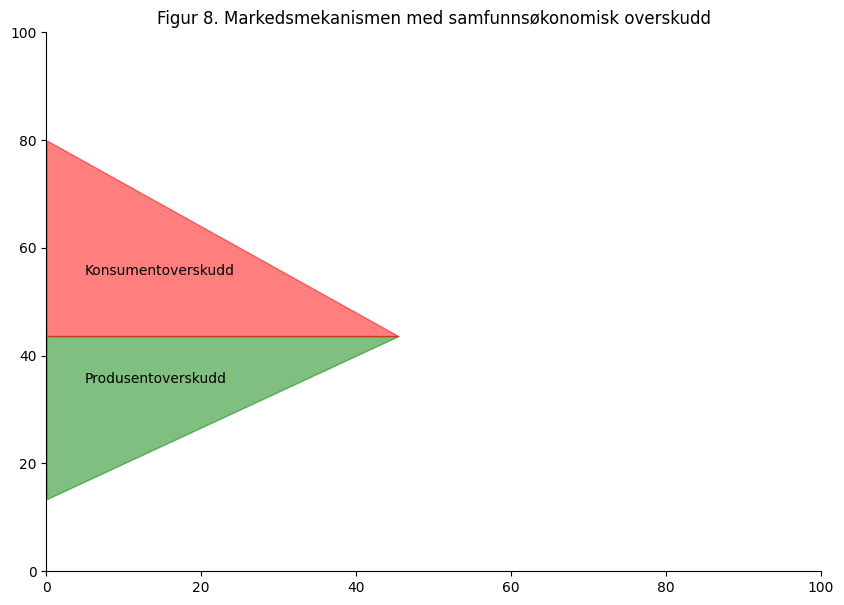

In [50]:
fig, ax = create_ax()

# Defining q as a numpy array
q= np.linspace(0.1,x_eq,100)
# filling the area for consumer surplus
ax.fill_between(q,p_eq,demand(q,0), color = 'green',alpha = 0.5)
# filling the area for producer surplus
ax.fill_between(q,supply(q),p_eq, color = 'red',alpha = 0.5)
# text for consumer surplus
ax.text(5, 55, "Konsumentoverskudd", fontsize=10)
# text for producer surplus
ax.text(5, 35, "Produsentoverskudd", fontsize=10)

# Setting title
ax.set_title('Figur 8. Markedsmekanismen med samfunnsøkonomisk overskudd')

ax.legend(loc='best', frameon=False);

#plt.savefig('figur8.png', dpi=600,  bbox_inches='tight')

#figur8 = imread('figur8.png')

#plt.close()

In [51]:
equ_t5 = sp.Eq(demand(x,5),supply(x))
# løser likningen for x
x_eq_t5 = sp.solve(equ_t5,x)
# konverterer til float
x_eq_t5 = float(x_eq_t5[0])
# finner likevektsprisen
p_eq_t5=supply(x_eq_t5)
# finner dødvektstapet
q2 = np.linspace(0,x_eq_t5,100)
# finner avgiftsproveny
q3 = np.linspace(x_eq,x_eq_t5,100)

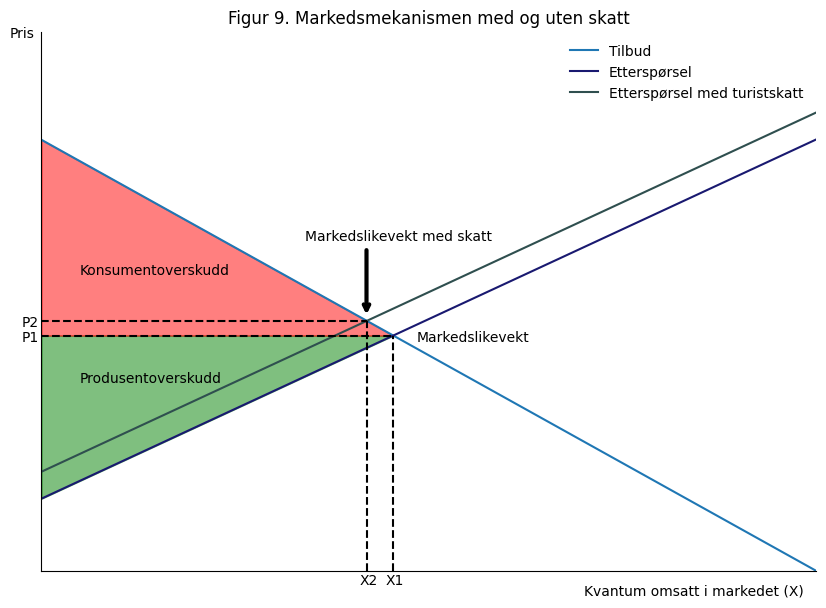

In [52]:
# I know doing it like this is not the best way, but time is running short
x_num=np.linspace(0.1,500,100)
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num,supply(x_num) ,label='Tilbud')
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='midnightblue')
ax.plot(x_num,demand(x_num,5) ,label='Etterspørsel med turistskatt', color='darkslategray')


# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black')
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black')


# make new line for equilibrium with tax
ax.vlines(x_eq_t5, 0, p_eq_t5, linestyles='dashed', color='black')
ax.hlines(p_eq_t5, 0, x_eq_t5, linestyles='dashed', color='black')

# make a new text for equilibrium with tax
ax.text(x_eq_t5-8, p_eq_t5+15, 'Markedslikevekt med skatt', fontsize=10)

# make an arrow pointing to the new equilibrium
ax.annotate("", xy=(42, 47), xytext=(42, 60),
            arrowprops=dict(arrowstyle='->', color='black',linewidth=3),
            annotation_clip=False)



# Setting title
ax.set_title('Figur 9. Markedsmekanismen med og uten skatt')

# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])
# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet (X)', fontsize=10)
# y-axis label
ax.text(-4, 99, 'Pris', fontsize=10)
# markedslikevekt
ax.text(x_eq+3, p_eq-1, 'Markedslikevekt', fontsize=10)
# X1
ax.text(x_eq-1, -2.5, 'X1', fontsize=10)
# P1
ax.text(-2.5, p_eq-1, 'P1', fontsize=10)
# X2
ax.text(x_eq_t5-1, -2.5, 'X2', fontsize=10)
# P2
ax.text(-2.5, p_eq_t5-1, 'P2', fontsize=10)
# Defining q as a numpy array
q= np.linspace(0.1,x_eq,100)
# filling the area for consumer surplus
ax.fill_between(q,p_eq,demand(q,0), color = 'green',alpha = 0.5)
# filling the area for producer surplus
ax.fill_between(q,supply(q),p_eq, color = 'red',alpha = 0.5)
# text for consumer surplus
ax.text(5, 55, "Konsumentoverskudd", fontsize=10)
# text for producer surplus
ax.text(5, 35, "Produsentoverskudd", fontsize=10)

ax.legend(loc='best', frameon=False);

#plt.savefig('figur9.png', dpi=600,  bbox_inches='tight')

#figur9 = imread('figur9.png')

#plt.close()

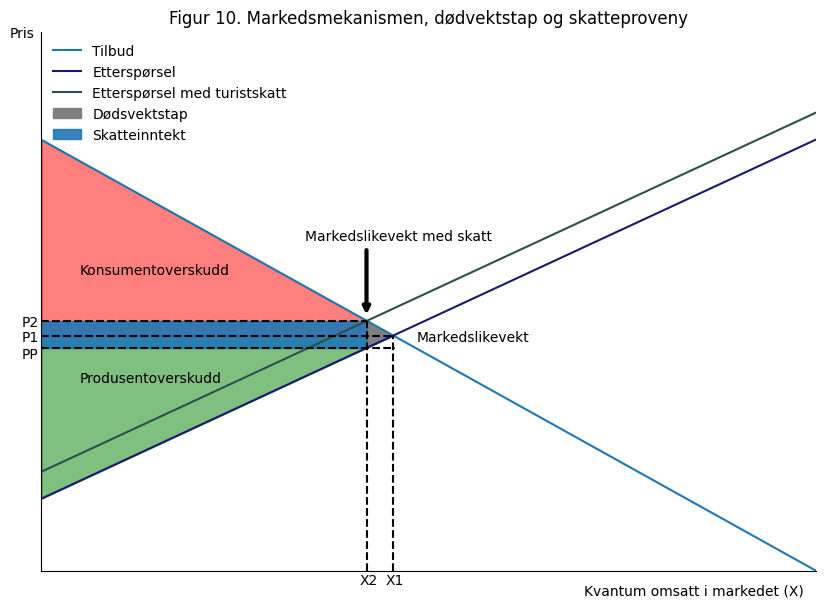

In [53]:
# I know doing it like this is not the best way, but time is running short
x_num=np.linspace(0.1,500,100)
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num,supply(x_num) ,label='Tilbud')
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='midnightblue')
ax.plot(x_num,demand(x_num,5) ,label='Etterspørsel med turistskatt', color='darkslategray')


# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black')
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black')


# make new line for equilibrium with tax
ax.vlines(x_eq_t5, 0, p_eq_t5, linestyles='dashed', color='black')
ax.hlines(p_eq_t5, 0, x_eq_t5, linestyles='dashed', color='black')

# make a new text for equilibrium with tax
ax.text(x_eq_t5-8, p_eq_t5+15, 'Markedslikevekt med skatt', fontsize=10)

# make an arrow pointing to the new equilibrium
ax.annotate("", xy=(42, 47), xytext=(42, 60),
            arrowprops=dict(arrowstyle='->', color='black',linewidth=3),
            annotation_clip=False)



# Setting title
ax.set_title('Figur 10. Markedsmekanismen, dødvektstap og skatteproveny')

# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])
# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet (X)', fontsize=10)
# y-axis label
ax.text(-4, 99, 'Pris', fontsize=10)
# markedslikevekt
ax.text(x_eq+3, p_eq-1, 'Markedslikevekt', fontsize=10)
# X1
ax.text(x_eq-1, -2.5, 'X1', fontsize=10)
# P1
ax.text(-2.5, p_eq-1, 'P1', fontsize=10)
# X2
ax.text(x_eq_t5-1, -2.5, 'X2', fontsize=10)
# P2
ax.text(-2.5, p_eq_t5-1, 'P2', fontsize=10)
# Pp
ax.text(-2.5, p_eq_t5-7, 'PP', fontsize=10)
# Defining q as a numpy array
q= np.linspace(0.1,x_eq,100)
# filling the area for consumer surplus
ax.fill_between(q,p_eq,demand(q,0), color = 'green',alpha = 0.5)
# filling the area for producer surplus
ax.fill_between(q,supply(q),p_eq, color = 'red',alpha = 0.5)
# text for consumer surplus
ax.text(5, 55, "Konsumentoverskudd", fontsize=10)
# text for producer surplus
ax.text(5, 35, "Produsentoverskudd", fontsize=10)

# filling the deadweight loss
ax.fill_between(q3,supply(q3),demand(q3,0), color = 'grey', label='Dødsvektstap')

# dashed line for the tax proveny
ax.hlines(p_eq_t5-5, 0, p_eq+2, linestyles='dashed', color='black')

# filling the area for tax proveny
ax.fill_between(q2,p_eq_t5,p_eq_t5-5, color = '#1f77b4',alpha = 0.9, label='Skatteinntekt')

ax.legend(loc='upper left', frameon=False);

#plt.savefig('figur10.png', dpi=600,  bbox_inches='tight')

#figur10 = imread('figur10.png')

#plt.close()

PP blir nye produsentpris etter skatt og P2 blir nye konsumentpris etter skatt. Elastisiteten til etterspørselen blir å fortelle noe om hvor mye prisen blir å endre seg for både konsumenten og produsenten.

Det grå område er dødvektstapet etter avgiften, dette vil bli et samfunnsøkonomisk tap etter innføringen. Det hvite område vil bli avgiftsprovenyen, dette vil bli hva samfunnet tjener på avgiften.

In [54]:
p_eq_t5

46.36363636363636

# 1. Sammendrag

## Bakgrunn

Kandidatnummer 17 har fått i oppdrag av næringsminister Jan Christian Vestre å gjøre en samfunnsøkonomisk utredning av tiltak som kan gjøres for å innføre besøksbidrag for turisme i Nord-Norge. Det vi skal se videre på her er besøksbidrag i form av en turistskatt. Nord-Norge har i de siste tiårene opplevd en stor vekst i turisme, og regjeringen har gitt grønt lys for at norske kommuner kan innføre en turistskatt. Dette er en skatt som eksempelvis betales av overnattingsgjester i hoteller, leiligheter og lignende eller som betales i flybilletten til destinasjonen.

## Begrunnelse

Grunnen til å innføre en slik skatt er for å kunne verne miljøet og få inn en inntekt på fellesgoder som turister benytter seg av. Fellesgoder er goder som er tilgjengelig for alle, og eksempler på slike goder kan være:

* Offentlige toaletter
* Gangstier
* Turistinformasjon
* Sikkerhet og beredskap
* Generelt vedlikehold av turistattraksjoner

## Utbredelse

Turistskatt er en form for skatt som har vært innført allerede i mange land og byer, og som allerede har vært i bruk i lang tid på Svalbard. Der blir det lagt på en miljøavgift på 150 kroner for alle flybilleter, cruisebåtbilletter eller liknende befordringsmidler inn til øya. 

I europa så har turistskatt vært innført allerede flere steder:

1. I Italia så er det innført en turistskatt i Venezia. Skatten er på 1-5 euro per person per natt og varierer i forhold til når på året man er der.

2. I Frankrike så er det innført en turistskatt i Paris. Skatten er på  0.25-5 euro per person per natt.

3. I Spania så er det innført en turistskatt i Barcelona. Skatten er på mellom 2.5-5 euro per person per natt.

## Erfaringer

Med innføring av en turistskatt er det meningen at etterspørselen skal bli lavere til reisedestinasjonen. Dette vil føre til at det blir mindre bruk og miljøbelastning.

På svalbard har de samlet inn miljøavgift siden 1. april 2007. Med pengene har de opprettet et miljøvernfond og hvert år tildeler fondet 10-25 millioner kroner til miljøvern- og kulturminneprosjekter.

# 2. Struktur

## Kapittel 2 - Turistnæringen i Nord-Norge

I kapittel 2 skal vi se nærmere på turistnæringene i Nord-Norge. I figurer skal vi nærmere se på hvordan hotellovernattinger har utviklet seg over tid, hvilken kapasitetsutnyttelse hotellene har og hvor mange overnattinger som er av turister. Vi skal videre se på hvor mange som sysselsettes i turistnæringen og hvor mye et hotellrom i Nord-Norge koster i gjennomsnitt. Til slutt skal vi se når på året det kommer mest turister. 

## Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt

I kapittel 3 skal vi se nærmere på hvordan en turistskatt kan påvirke turistnæringen i Nord-Norge. Vi skal se på hvordan en turistskatt kan pårvirke tilbud og etterspørsel etter hotellrom og flybilletter. Vi skal se på hvor stor effekt vi kan forvente av en turistskatt, og vi skal se på hvilke samfunnsøkonomiske konsekvenser turistskatten vil medbringe.

## Kapittel 4 - Konklusjon

Kapittel 4 blir en sammenfatning av det vi har sett på i kapittel 2 og 3. Her oppsummerer vi funnene fra utredningen og gir råd til Nærings- og fiskeridepartementet.


# 3. Turistnæringen i Nord-Norge

## Hotellkapasitet

I denne utredningen skal vi fokusere på turistnæringen i Nord-Norge. Nord-Norge består av fylkene Nordland og Troms og Finnmark. For å forstå viktigheten av dette markedet må vi se på hvordan hotellovernattinger har utviklet seg over tid, hvordan hotellkapasiteten er og hvor stor del av overnattinger som er av turister.

Fra 2016 til 2022 har Nord-Norge hatt en oppgang i hotellkapasitet på litt over 10 prosent. Kapasitetsutnyttelsen i Nord-Norge har vært stabilt litt over 40 prosent av alle hotellsenger til 2019 hvor det skjedde en nedgang i kapasitetsutnyttelsen på grunn av pandemi og reiserestriksjoner. I 2022 har kapasitetsutnyttelsen til hotellene begynt å stige igjen og ligger rett under 40 prosent igjen.


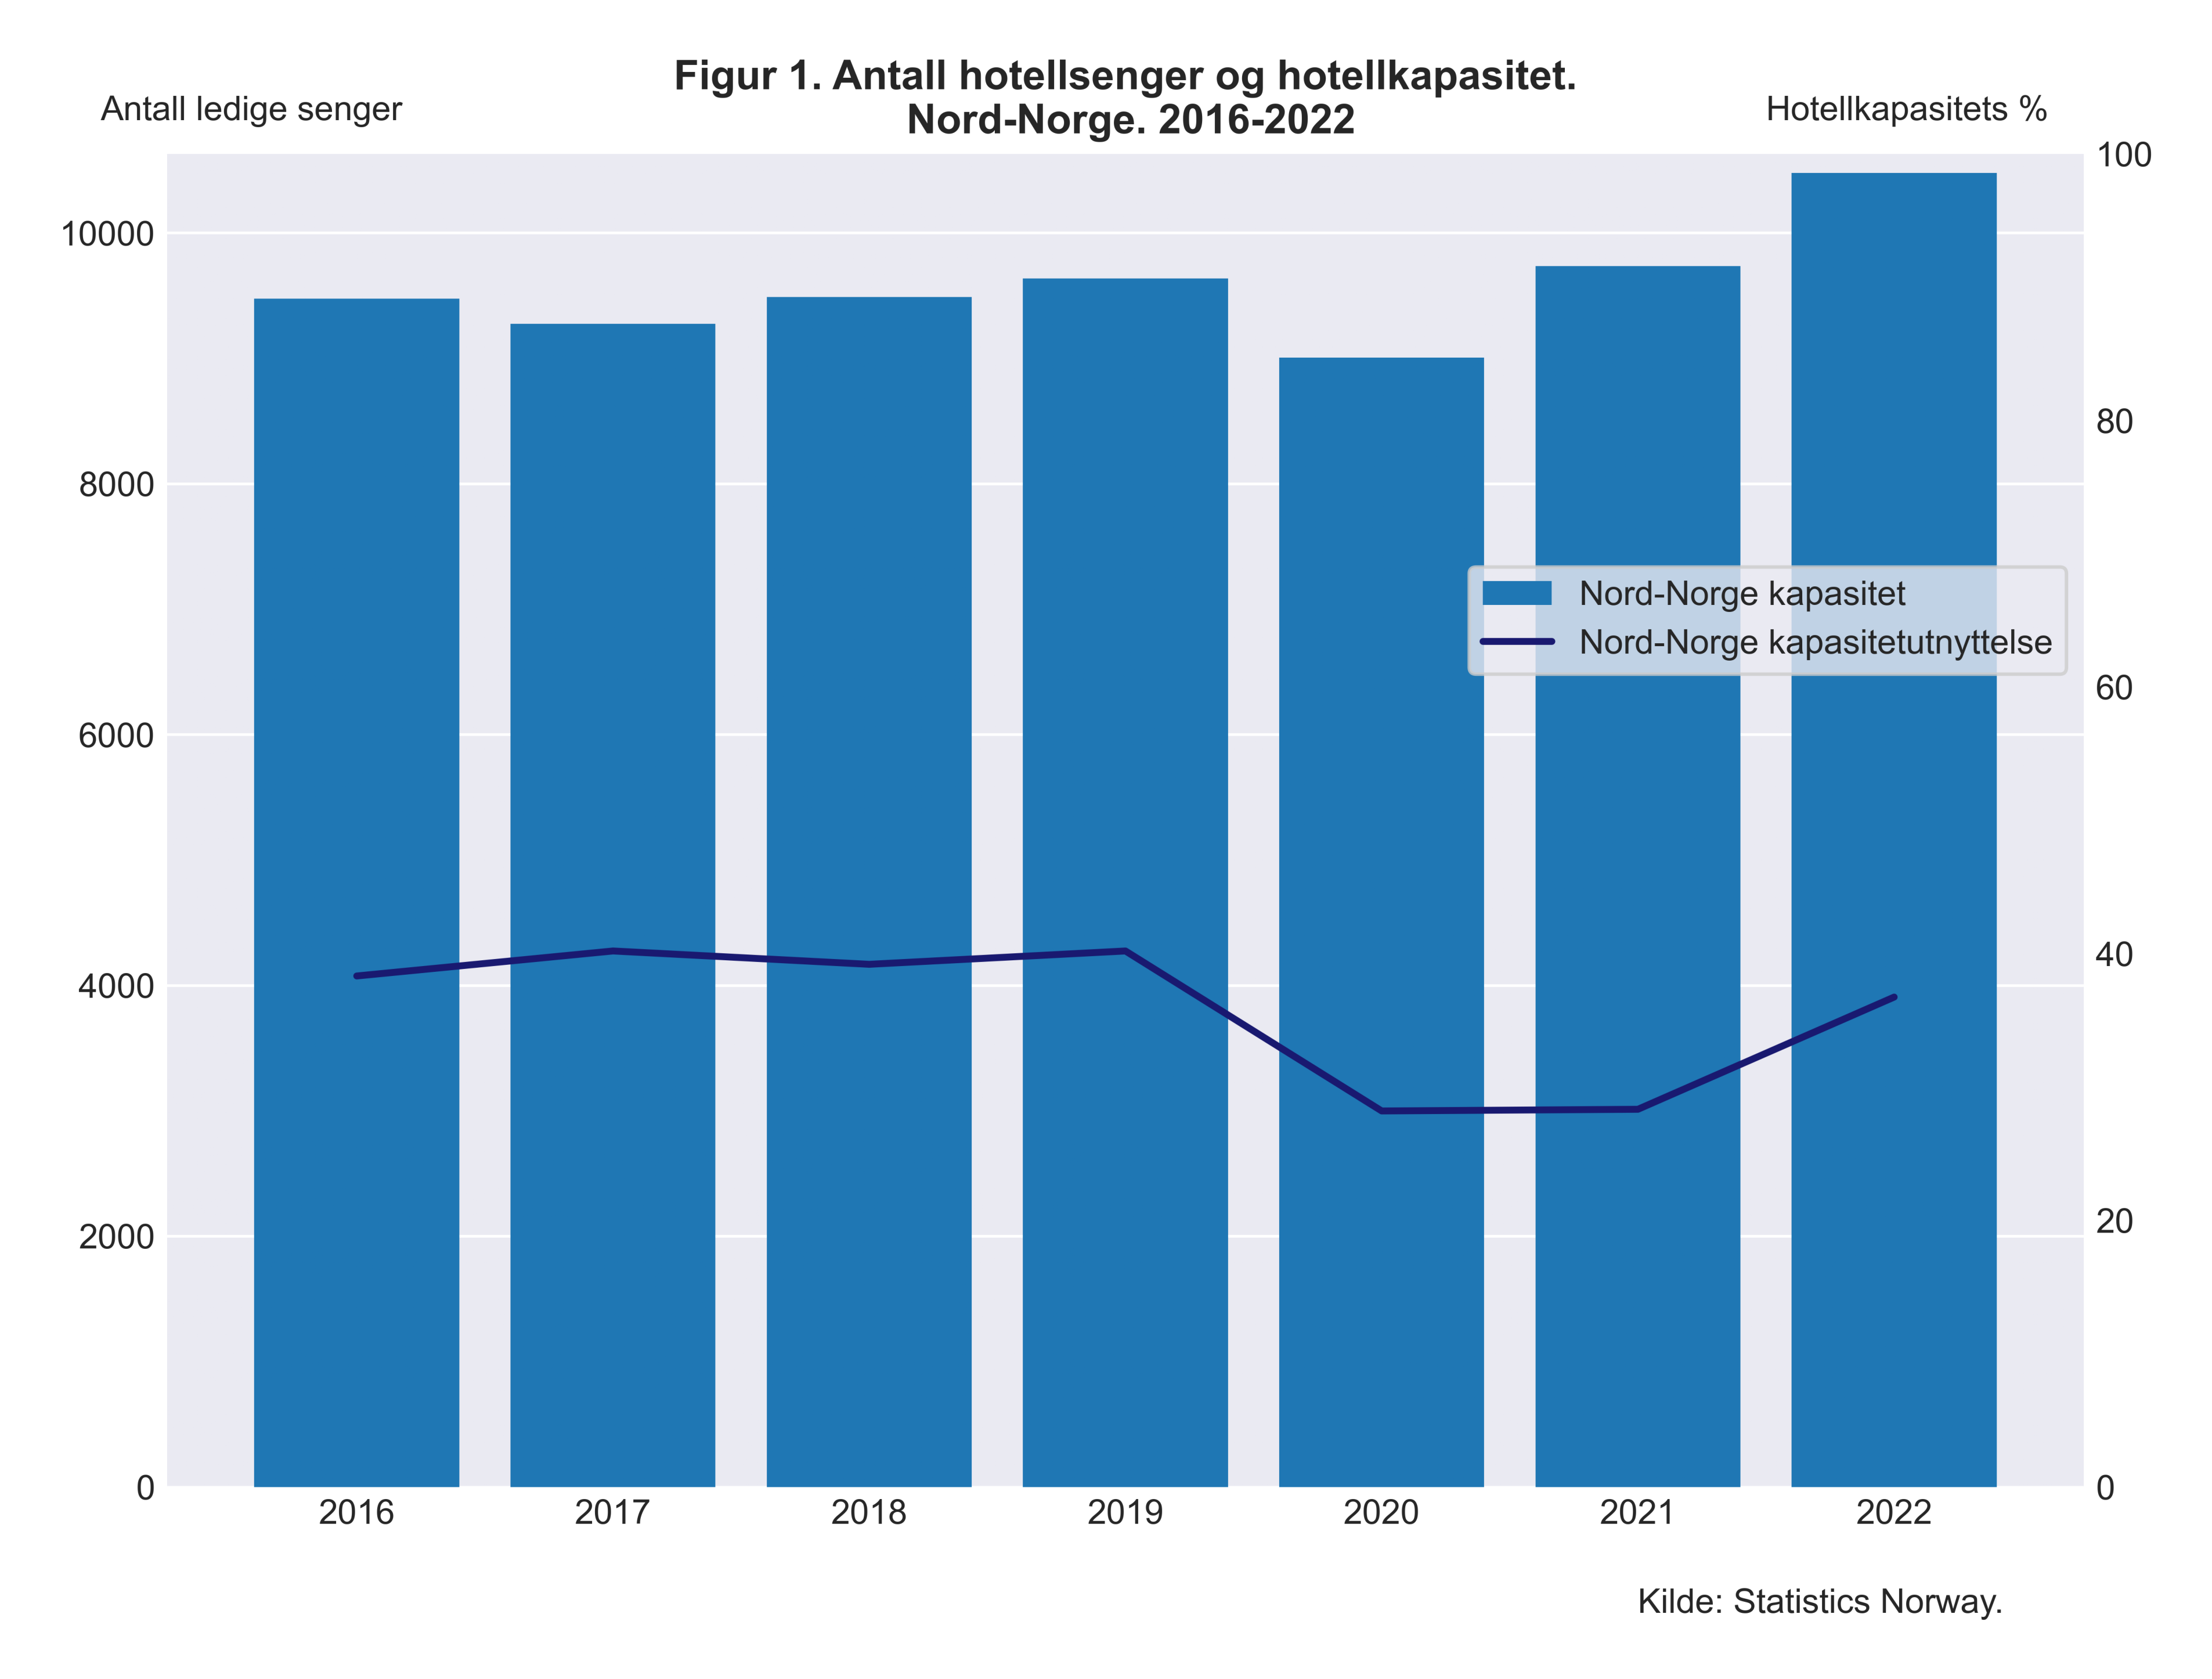

In [55]:
plt.figure(figsize=(9, 6), dpi=600)
plt.axis('off')
plt.imshow(figur1);

## Hotellovernattinger

Turister sto for 722000 hotellovernattinger i Nord-Norge i 2016 og hadde en topp på over 884000 overnattinger i 2019. På grunn av pandemien og covid-restriksjoner overnattet det kun 253000 turister i 2021. Etter pandemien har tallene tatt seg opp igjen og i 2022 sto turister for 40 prosent av overnattingene i Nord-Norge. 


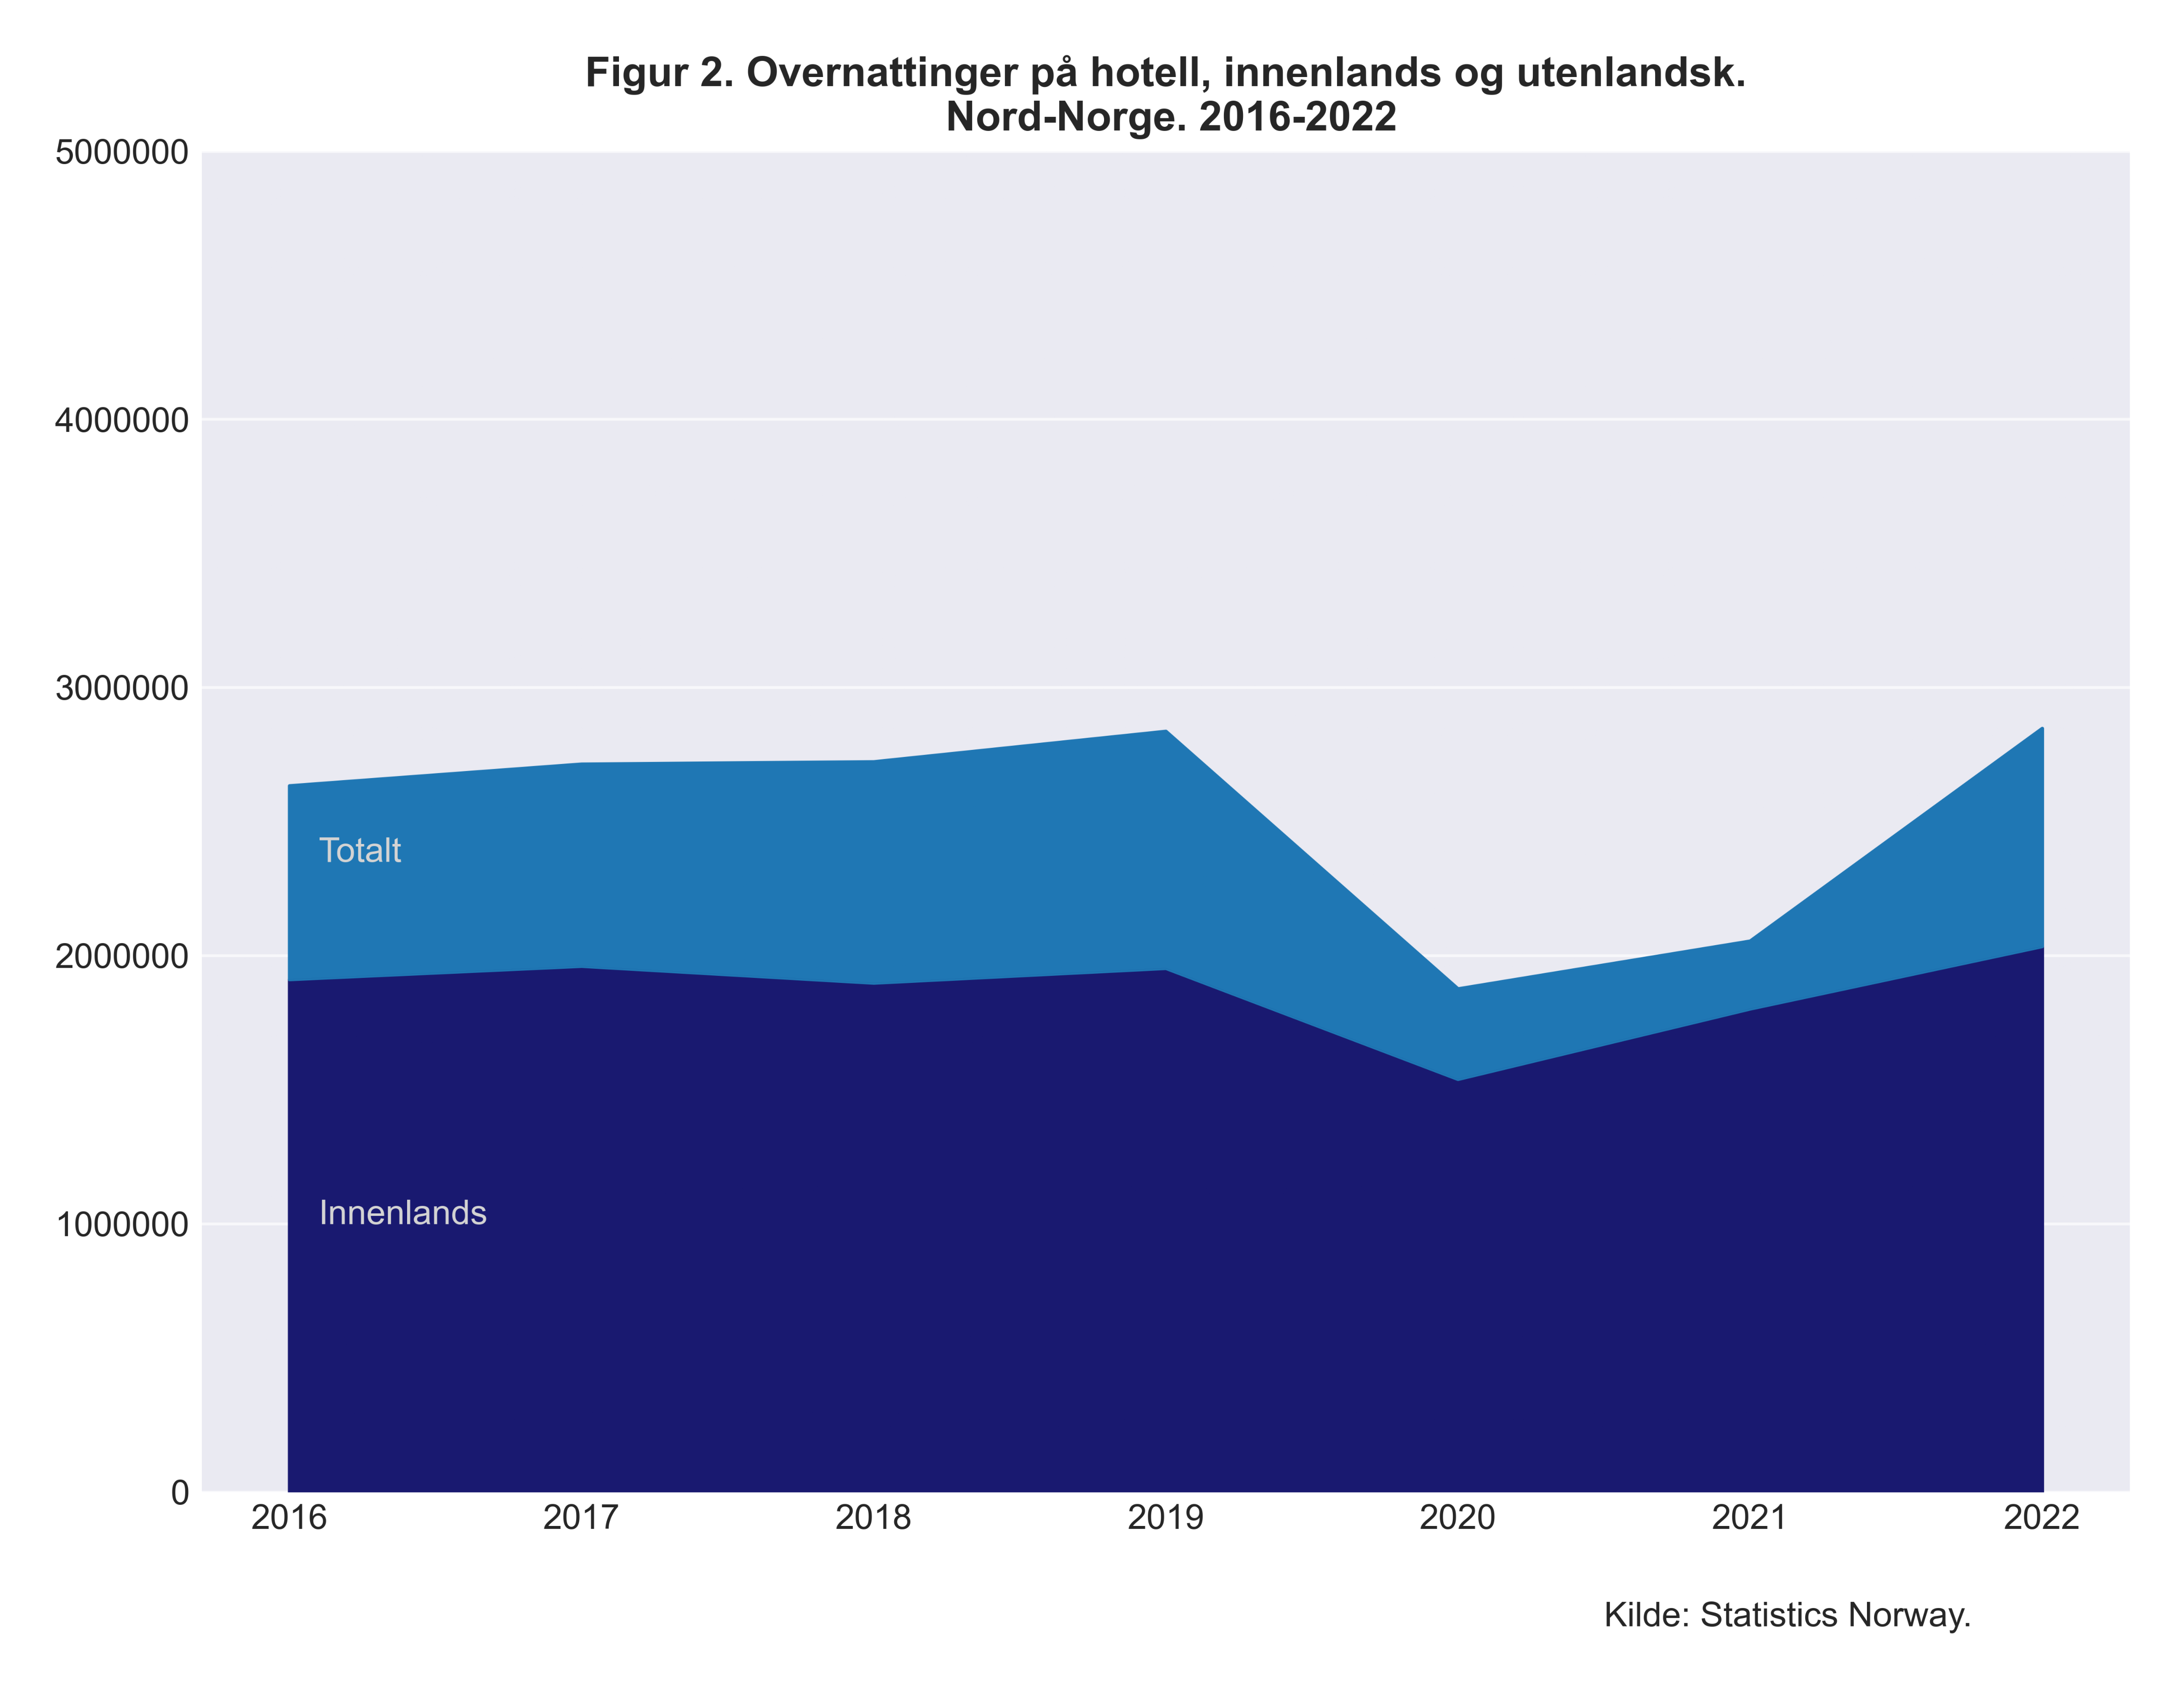

In [56]:
plt.figure(figsize=(10, 7), dpi=600)
plt.axis('off')
plt.imshow(figur2);

## Sysselsetting

Turisme sysselsetter mange mennesker i Nord-Norge (se figur 3). I 2013 var det 6900 personer som var sysselsatt innenfor turisme i Troms fylke, og i 2019 har det økt til 9000 personer. Dette er en økning på 2100 personer fra 2013. I 2019 var det totalt 21 900 personer som var sysselsatt innenfor turisme i Nord-Norge.


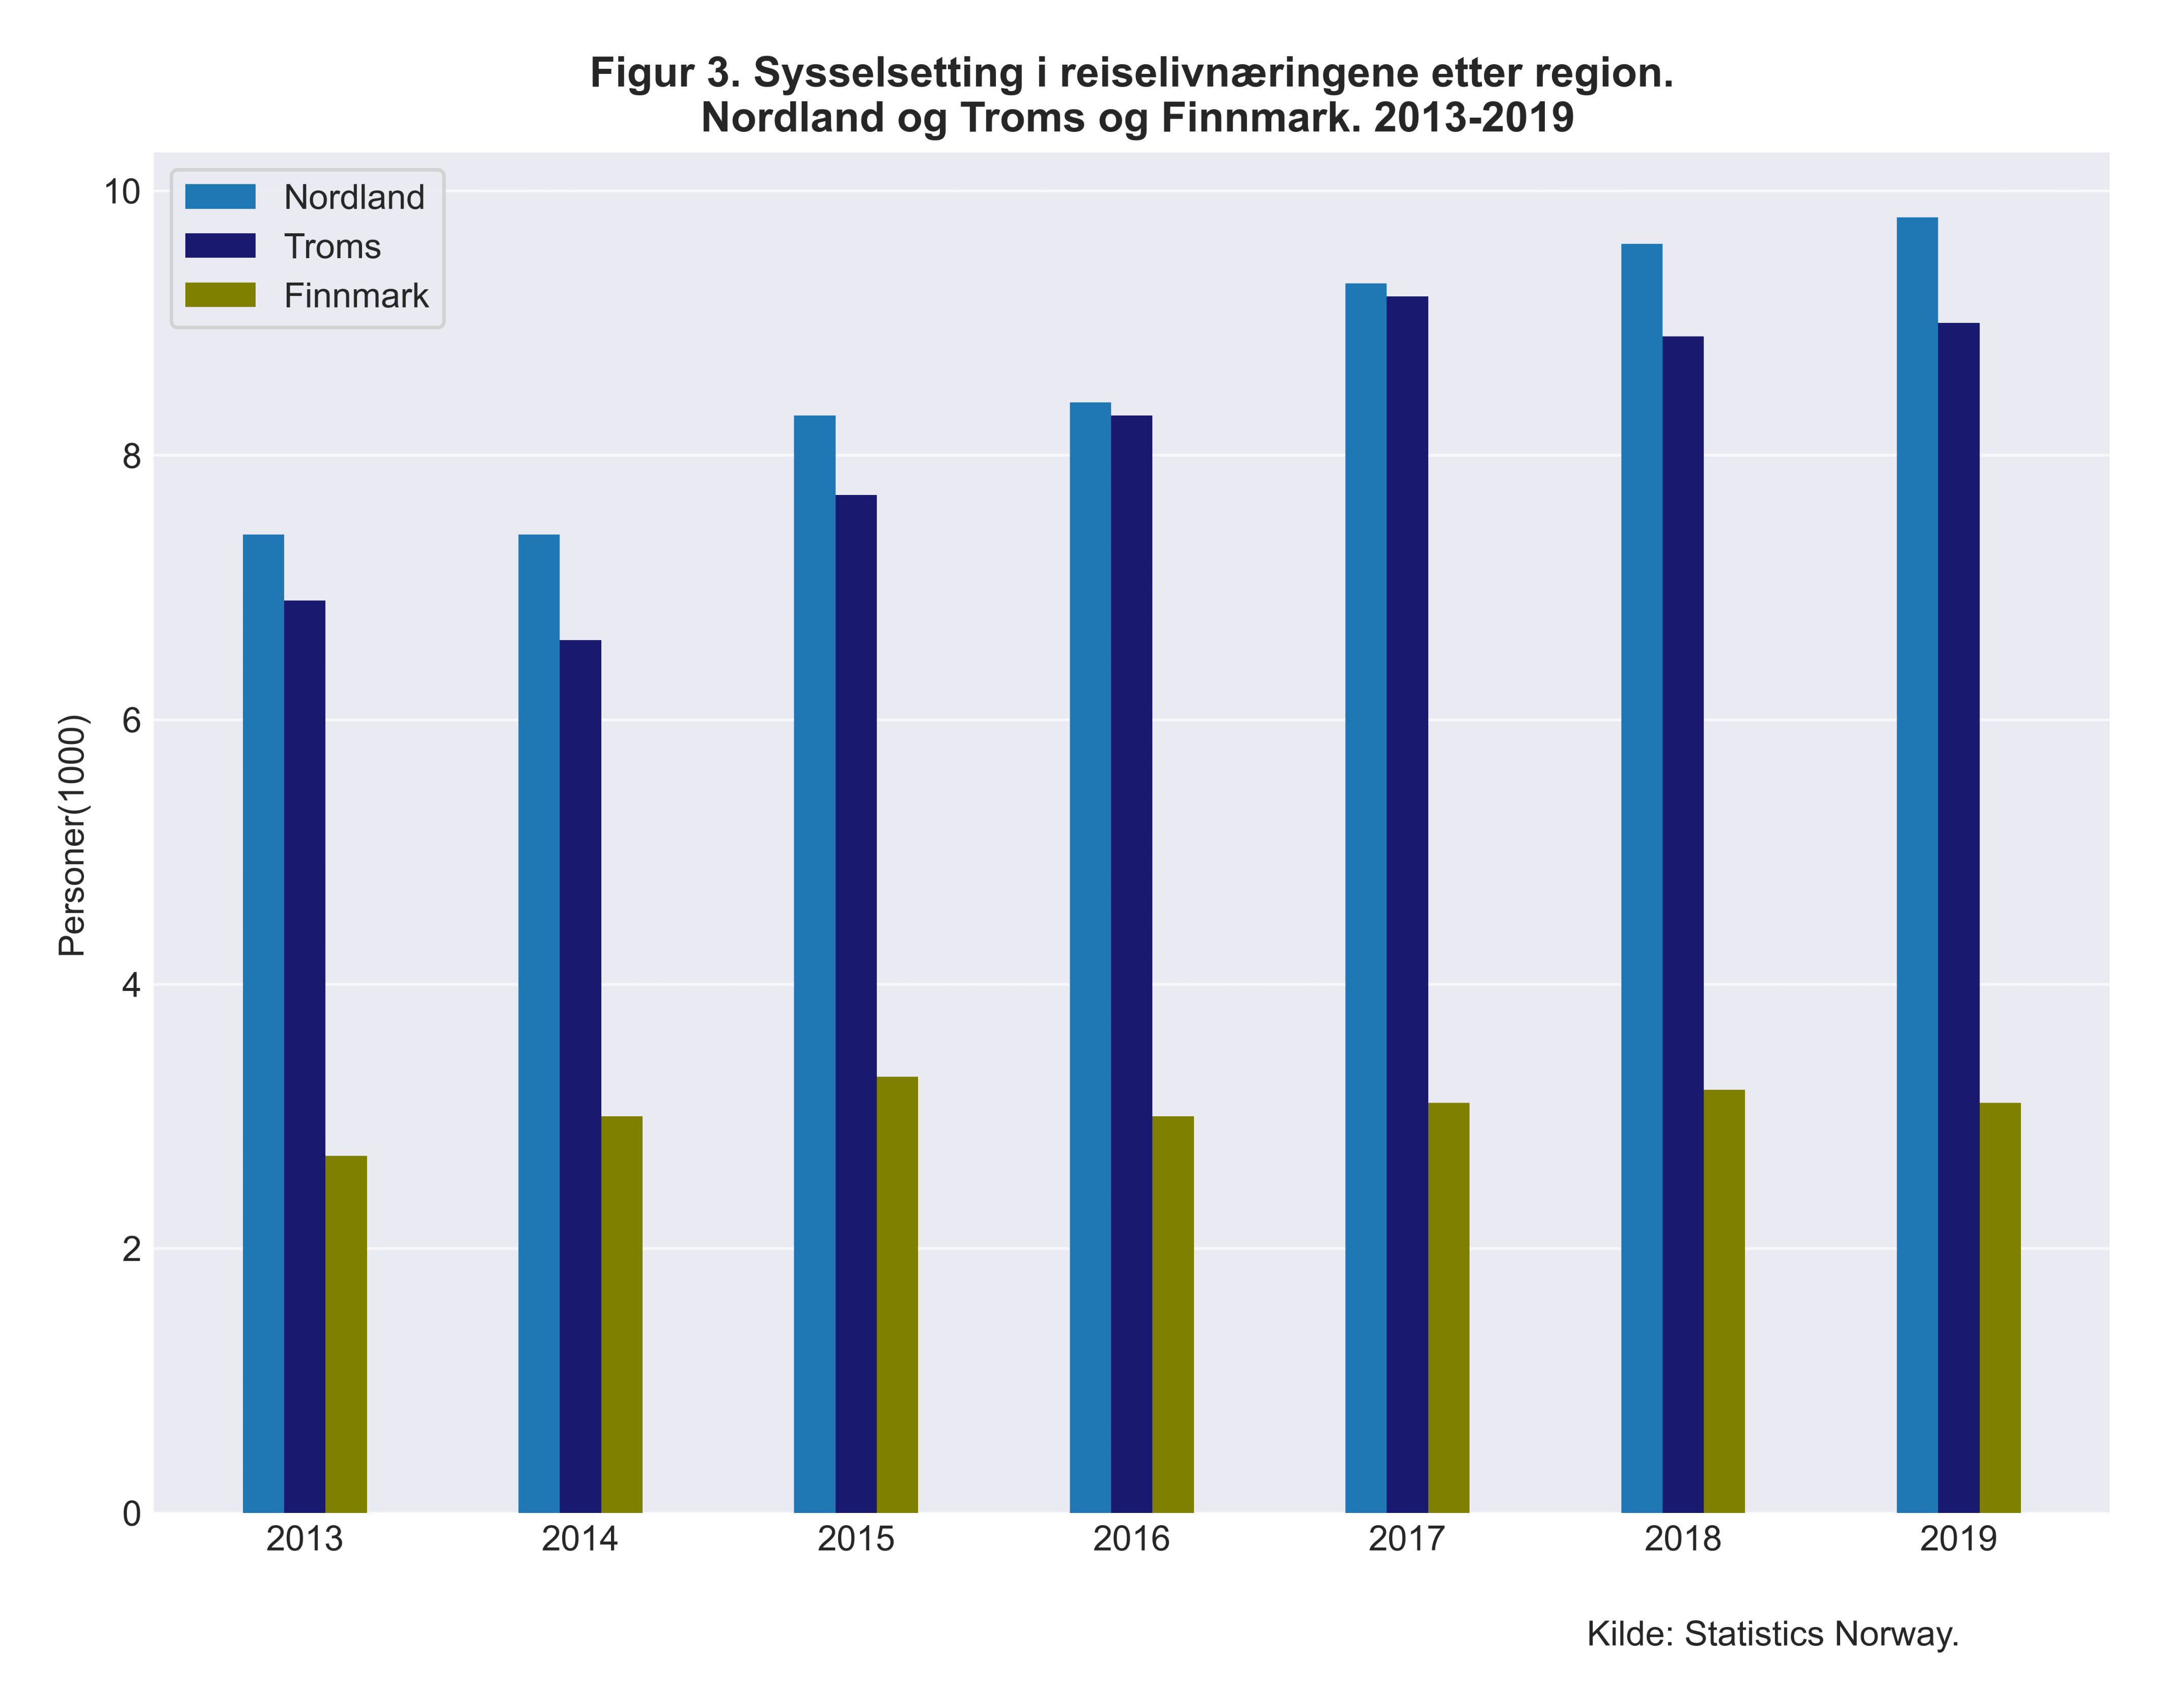

In [57]:
plt.figure(figsize=(10, 7), dpi=600)
plt.axis('off')
plt.imshow(figur3);

## Hotelløkonomien

Ser man på hotelløkonomien i Nord-Norge så har den hatt en liten økning de siste årene. Den gjennomsnittlige hotellromsprisen årlig var 858 kroner i 2016 og i 2022 var prisen økt til 1054 kroner. Over denne perioden har det blitt en økning på 22.8 prosent i årlig gjennomsnitt for hotellromsprisen.


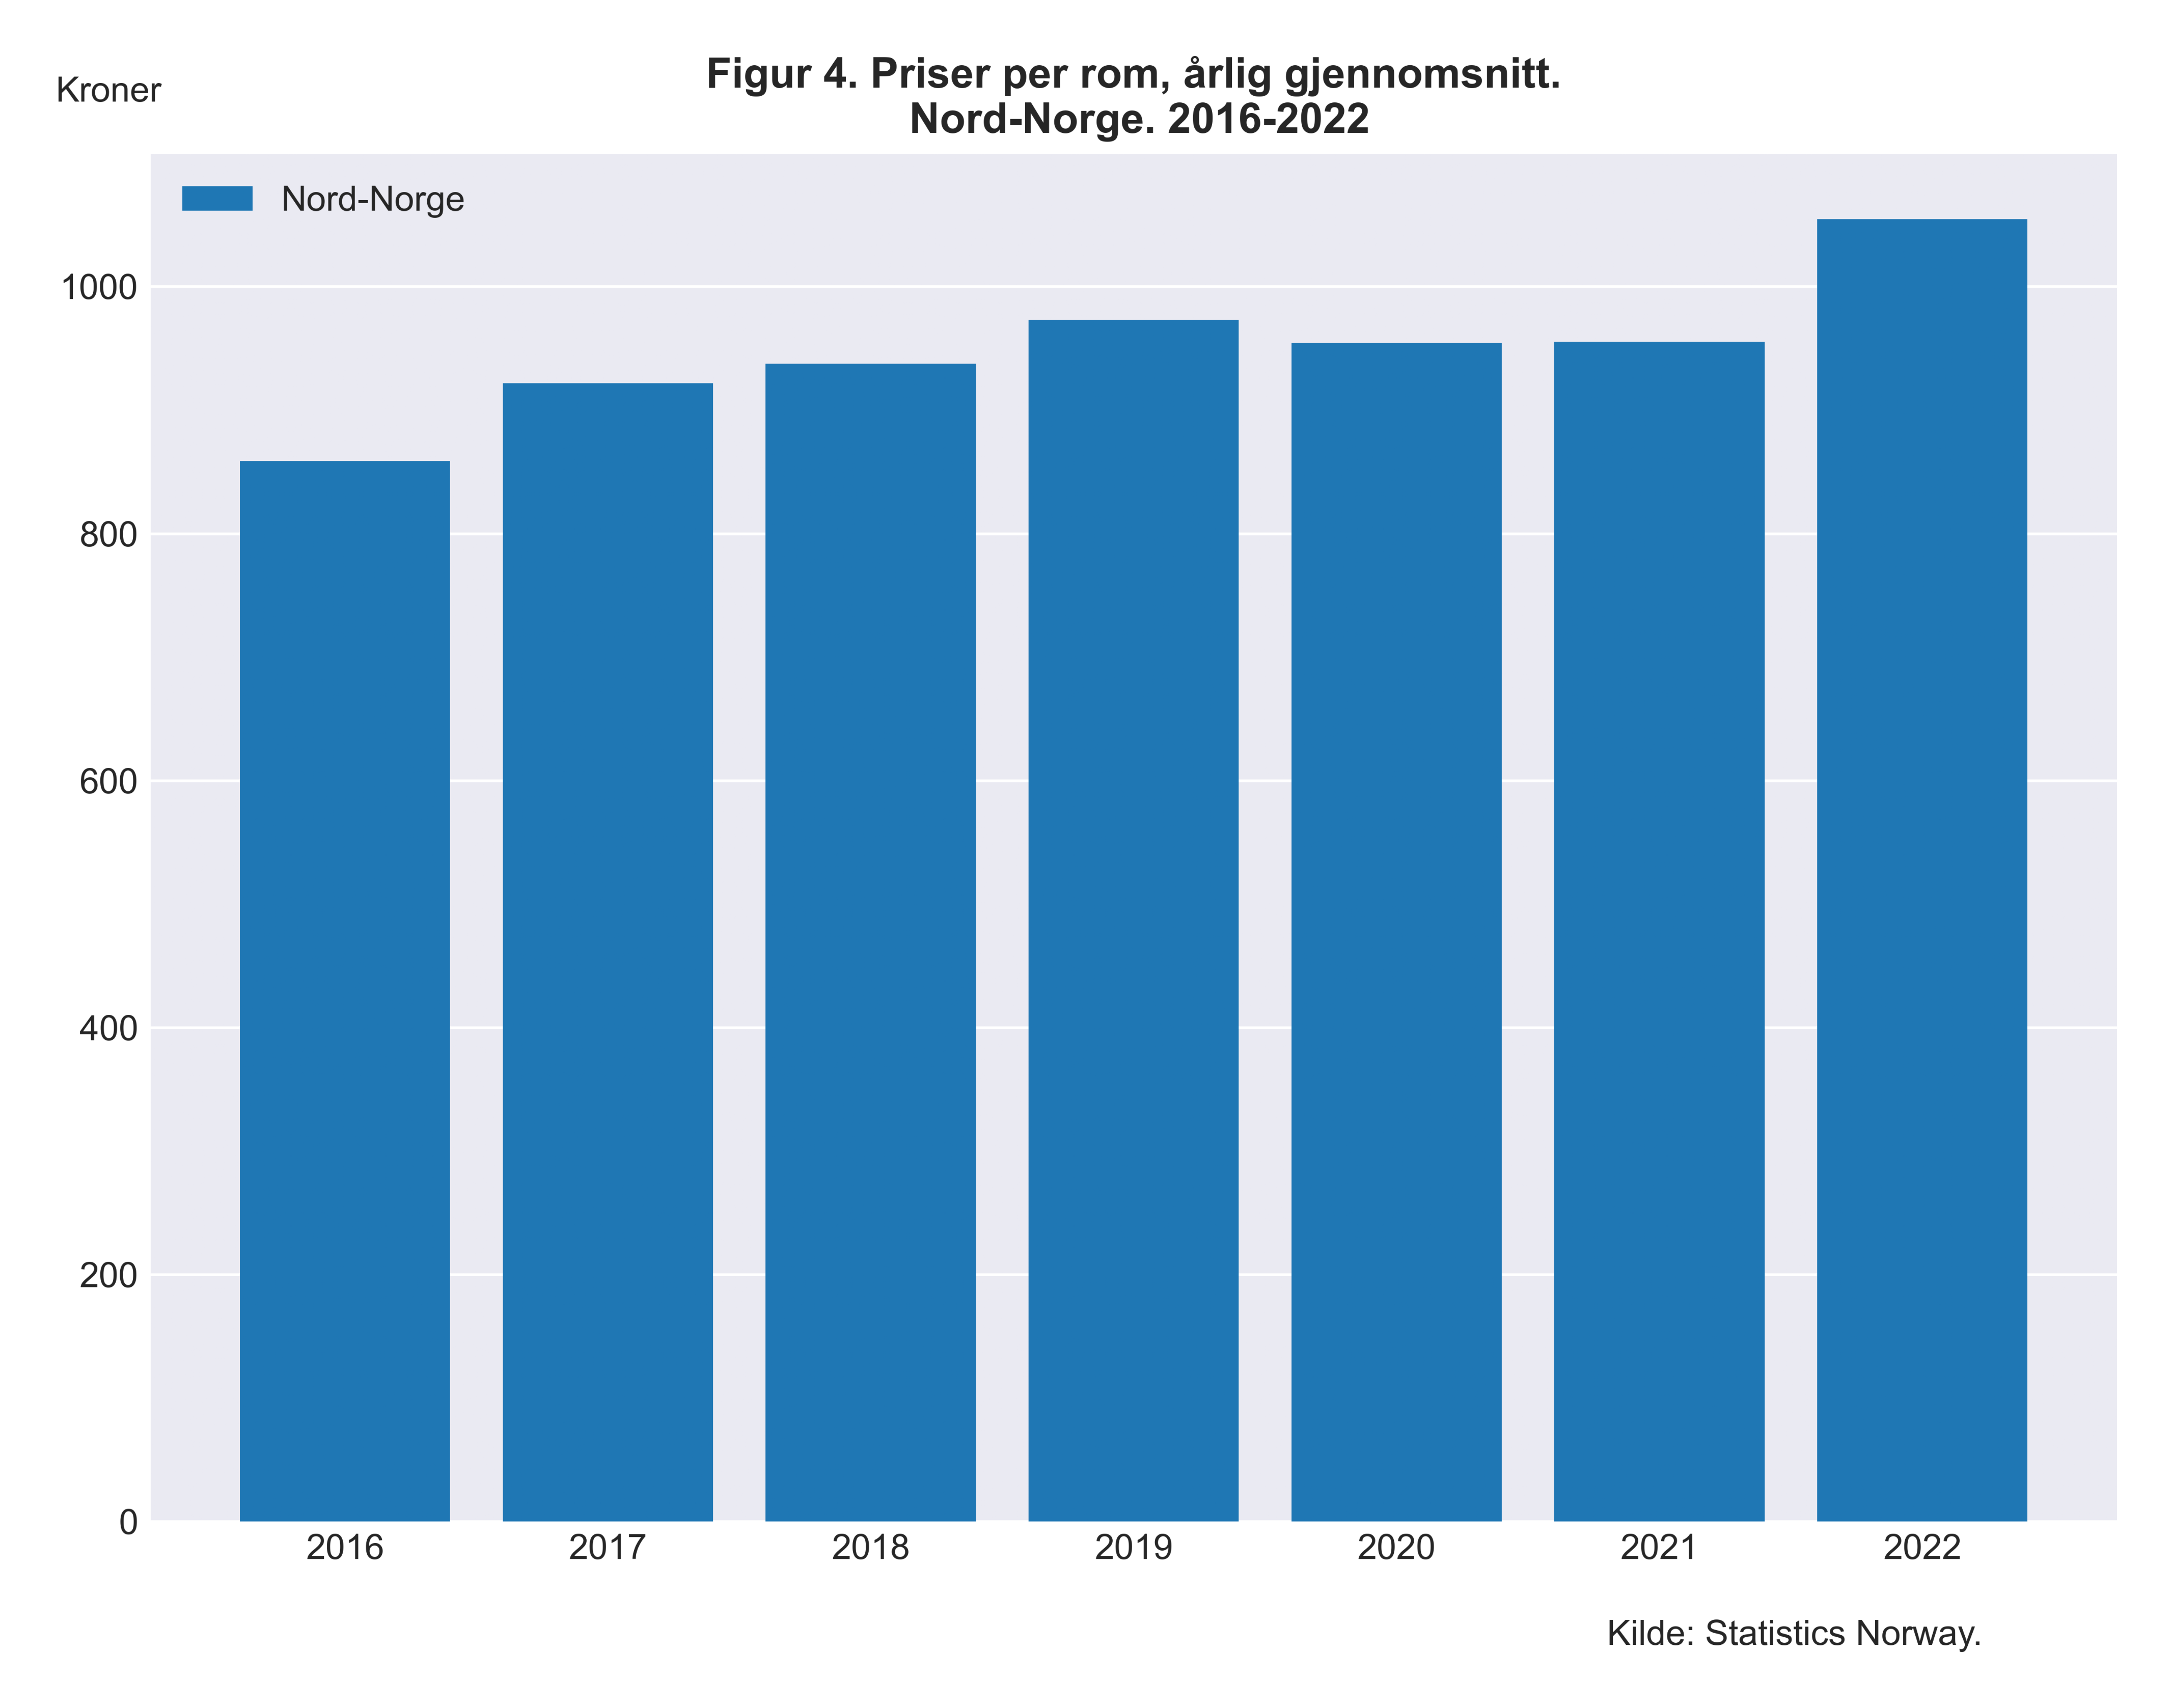

In [58]:
plt.figure(figsize=(10, 7), dpi=600)
plt.axis('off')
plt.imshow(figur4);

Ser man på prisene månedlig så varierer prisene fra hvilket år det er, man skulle tro at sommermånedene var dyrest da man ser i figur 6 at det er mest turisme, men det er ikke tilfellet. Den dyreste måneden var desember 2022 hvor gjennomsnittsprisen for et hotellrom lå på litt over 1400 kroner. Skriv dette bedre.


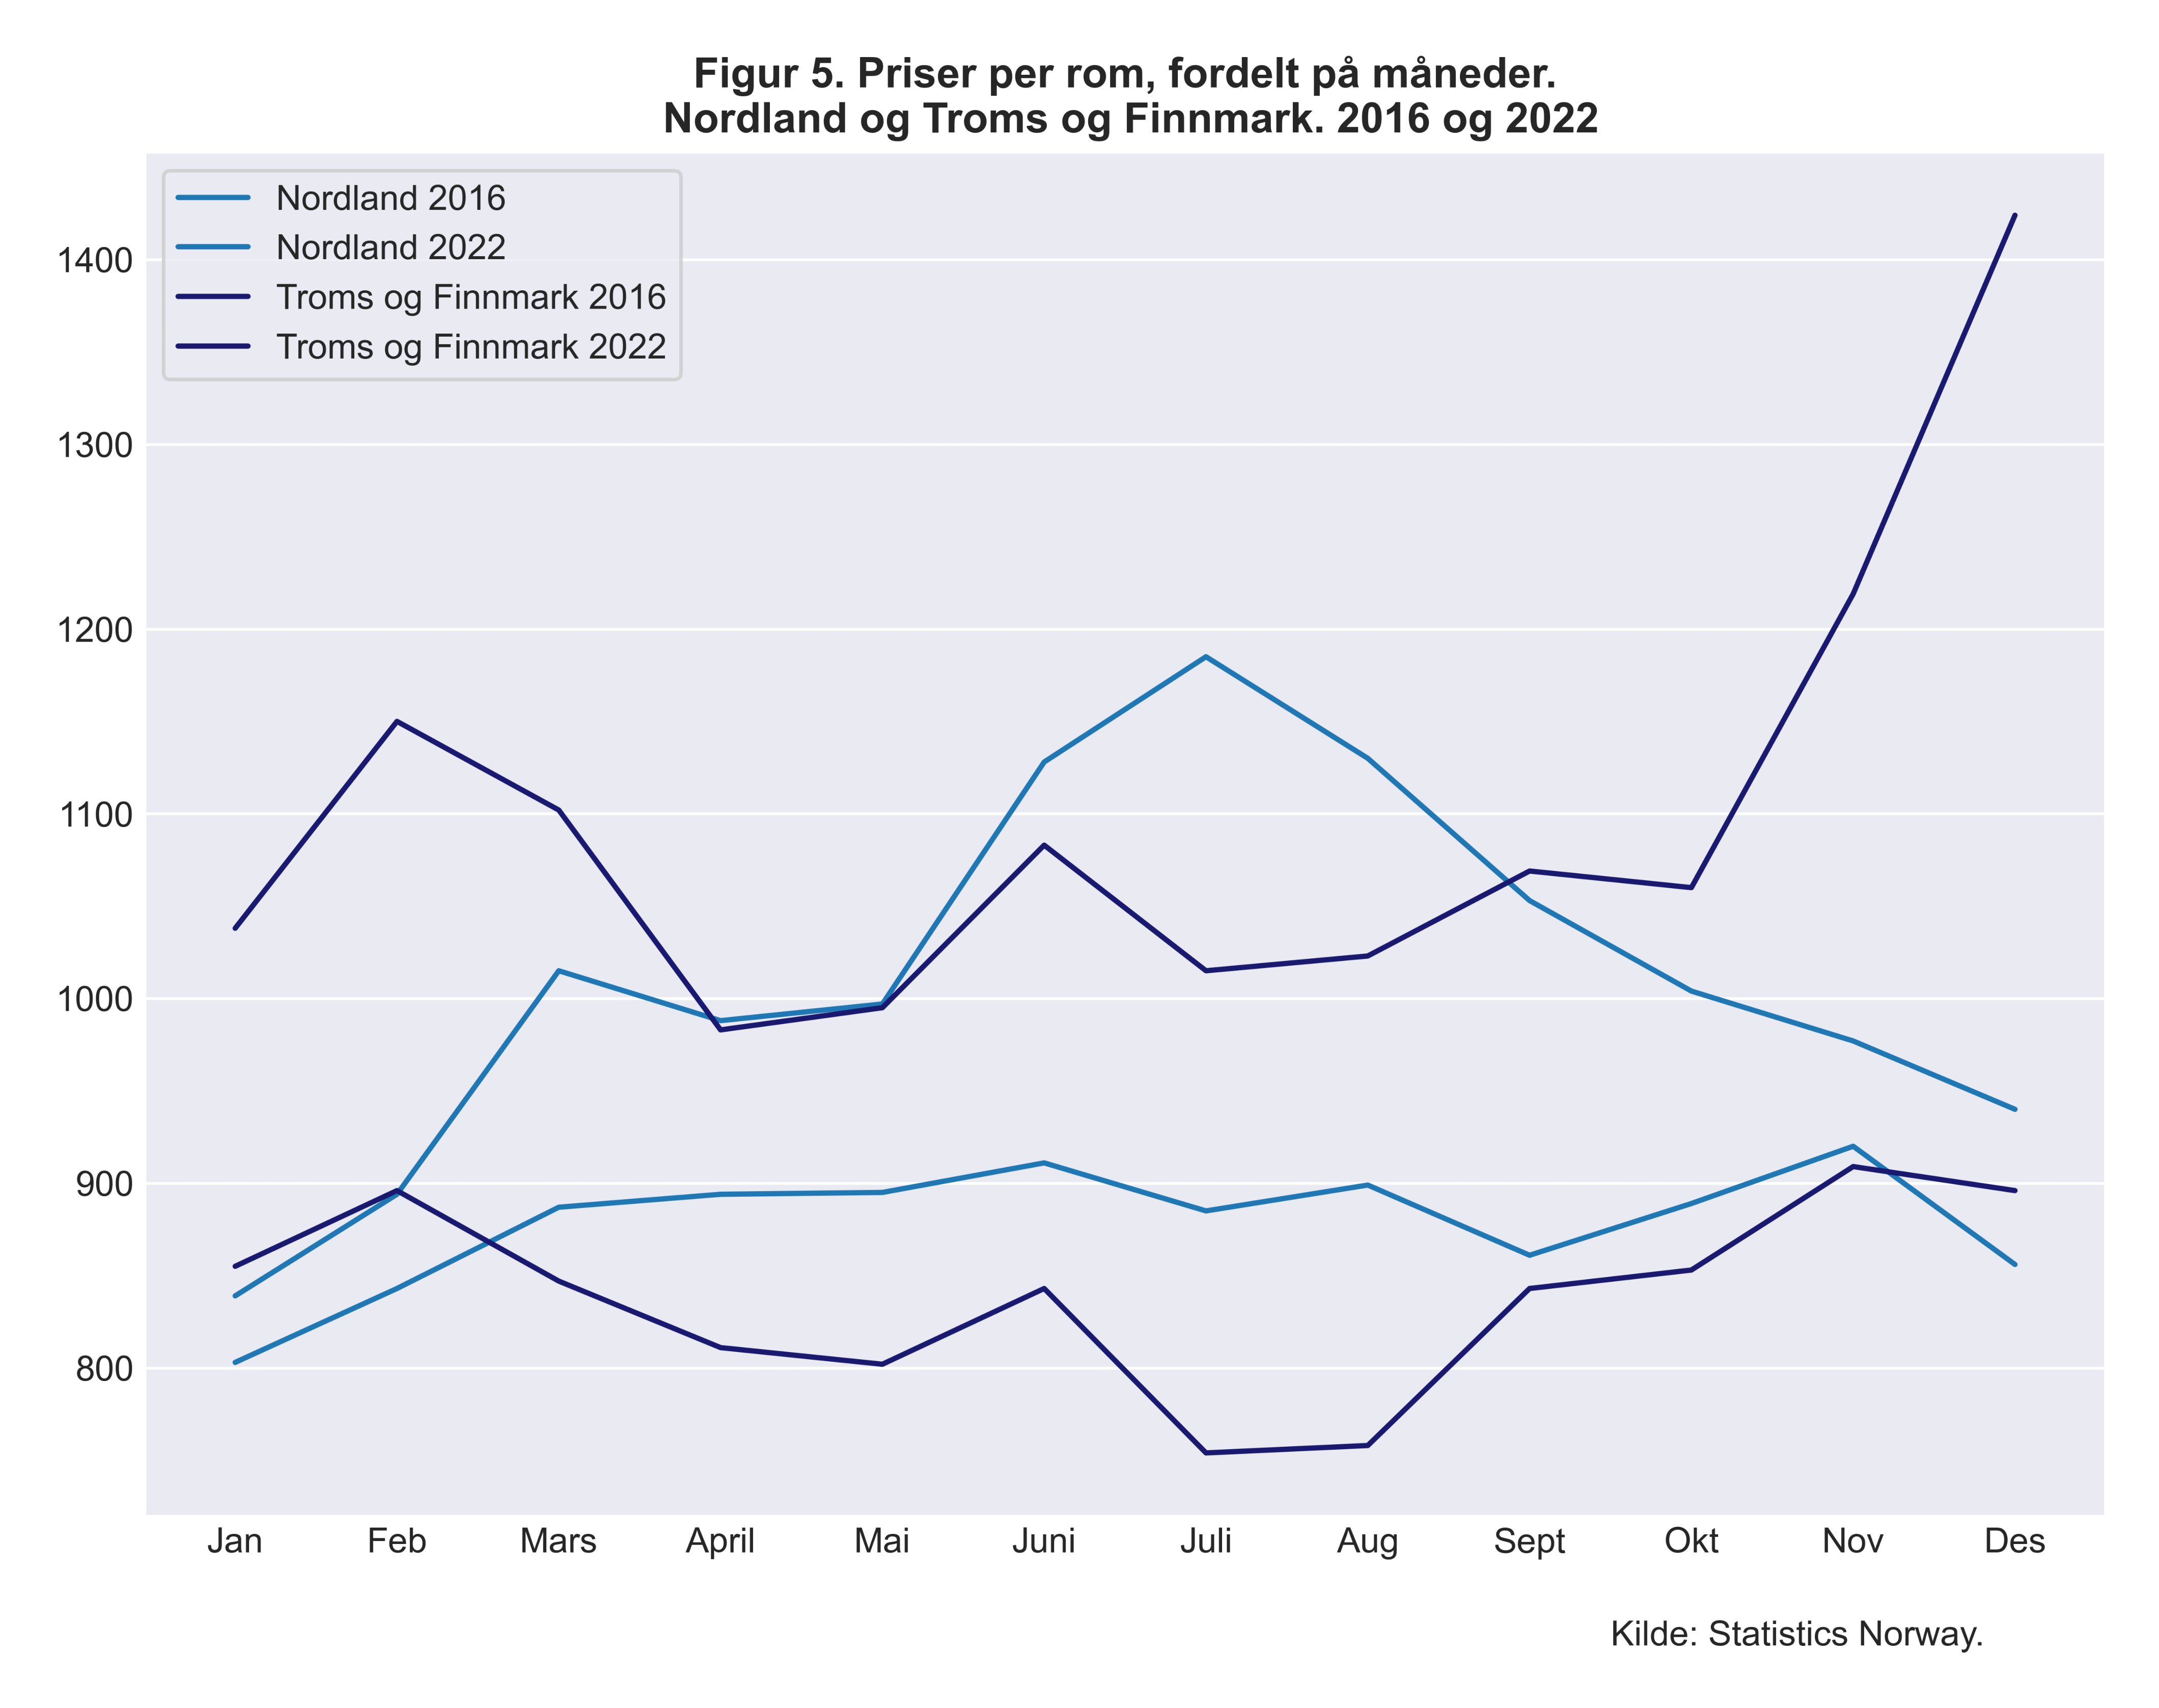

In [59]:
plt.figure(figsize=(10, 7),dpi=600)
plt.axis('off')
plt.imshow(figur5);

## Ankomsttider

I figur 6 kan man se hvilke tider på året turister ankommer Nord-Norge. Vi kan se at det er sommermånedene som er mest populære. I 2016 ankom det ca. 126 000 turister i juli måned mens i 2022 har det vært en liten nedgang til 111 000 ankomne turister i samme måned.


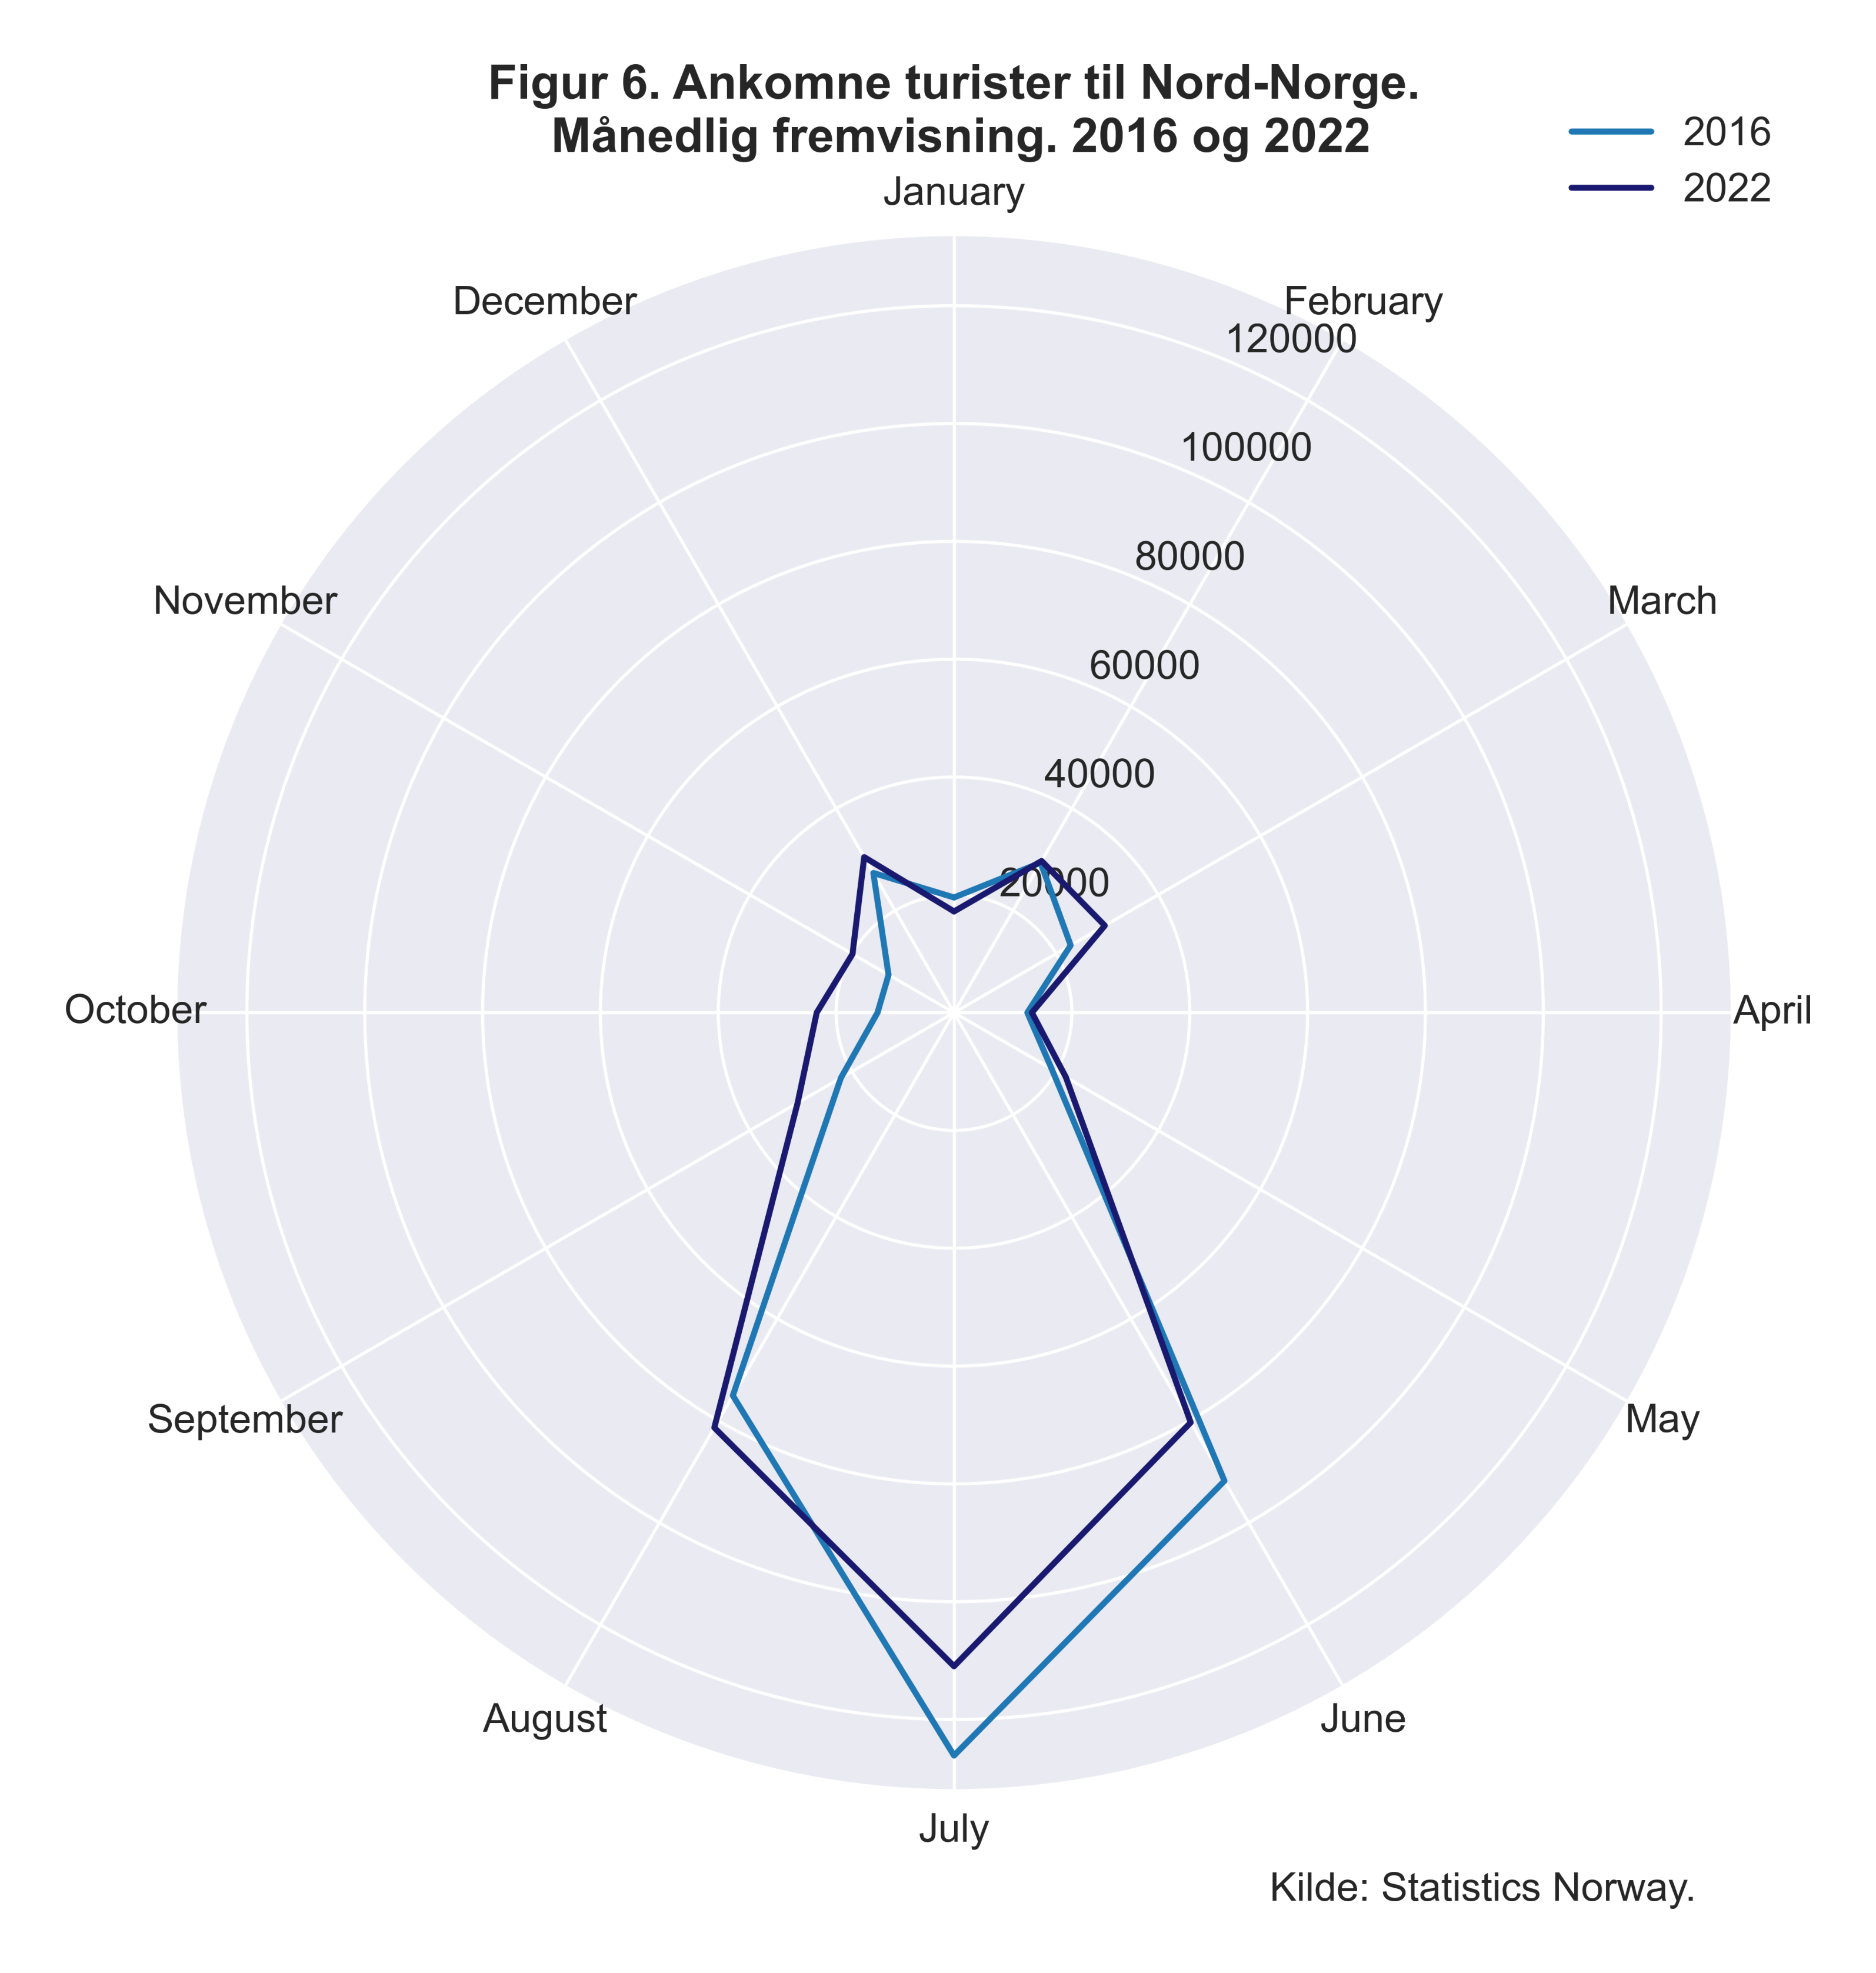

In [60]:
plt.figure(figsize=(10, 7),dpi=600)
plt.axis('off')
plt.imshow(figur6);

## Hvorfor dette er viktig

Vi ser på disse dataene når vi skal prøve å analysere et marked, og for å kunne se videre på hvilken effekt en turistskatt vil medbringe. Skriv mer her....

# 4. Samfunnsøkonomiske effekter av en turistskatt

## Innledning

Det Nord-Norske markedet er som vi har sett på tidligere et viktig marked for turistnæringen i Norge, og før vi ser på virkningene av en turistskatt skal vi se på hvordan et avgrenset marked fungerer uten en skatt.

Noen sentrale forutsetninger før vi begynner å se på analysen:

* Vi antar at verken tilbydere eller etterspørrere kan påvirke prisen på godet, vi tar prisen for gitt.

* For det andre så antar vi at tilbydere og etterspørrere kan fritt gå inn og ut av markedet uten noen kostnad.

* For det tredje så antar vi at godene som tilbys er homogene, det vil si at de er like for alle konsumenter.

I et marked er det normalt tilbud og etterspørsel som bestemmer prisen på et gode. Den økonomiske atferden som kan leses ut av en fallende etterspørselskurve, er at konsumentene er villige til å kjøpe mer av et gode dersom prisen de må betale reduseres. Mens på den andre siden av en stigende tilbudskurve er at produsenten er villig til å produsere mer dersom prisen på godet økes.

La oss starte med å ta for oss et eksempel der vi har markedslikevekt. Ved å sette sammen tilbud og etterspørsel får vi en beskrivelse av begge sidene.

Vi finner likevekten med å sette prisen lik etterspørsel i en likning. Vi får da:

$$ X^S=X^D $$

Pris og omsatt mengde i likevekt i markedet blir da P1 og X1, som kalles likevektspris og likevektsmengde. Disse kan man se i figur 7.


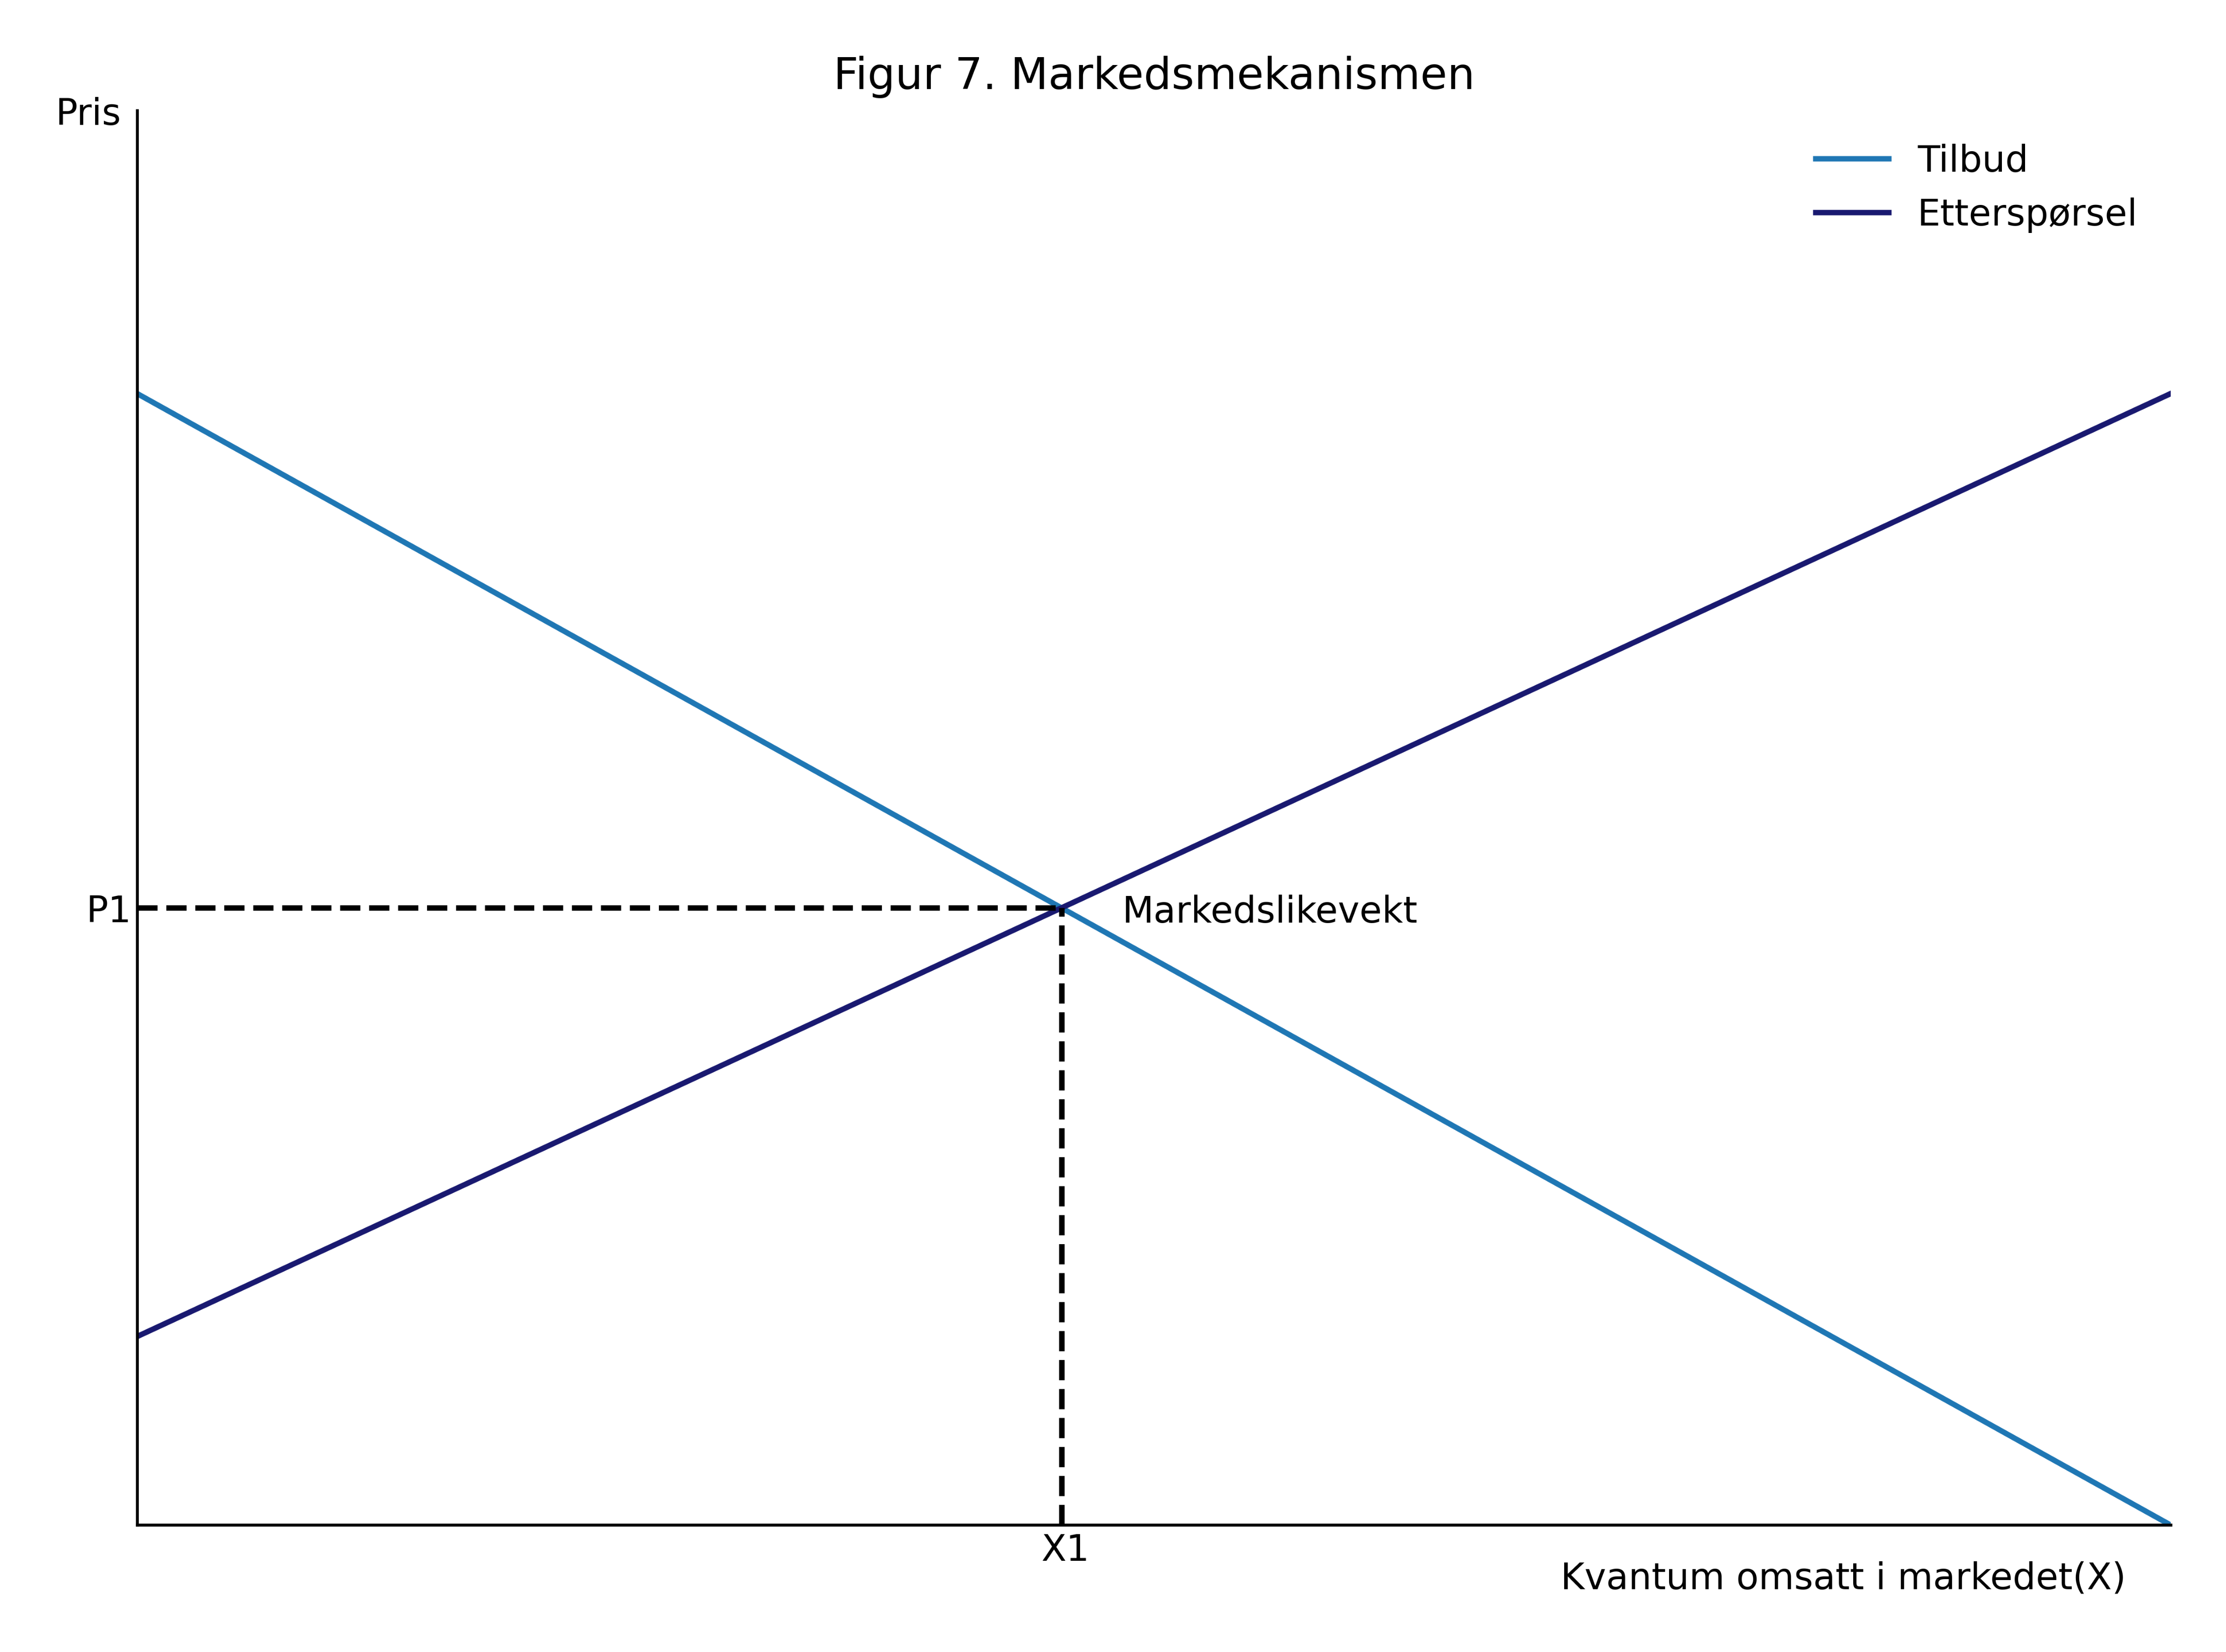

In [61]:
plt.figure(figsize=(10, 7),dpi=600)
plt.axis('off')
plt.imshow(figur7);

## Hvordan fungerer markedet uten turistskatt?

Dersom den norske kronen depresierer vil etterspørselen øke, og dersom det blir relativt dyrere i Norge vil etterspørselen falle. (Engebretsen, 2017)


## Forventede endringer i markedet etter turistskatt

## Samfunnsøkonomiske effekter

## Estimat av sentrale parameter

Vi konkretiserer eksempelet videre ved å se på et marked for tilbudet og etterspørsel etter hotellrom.

For å finne ut hvor stor etterspørselen er må vi summere over alle  konsumentene i markedet, for å konkretisere dette så setter vi alle konsumenter som summen av alle hotellovernattinger med formål å besøke Nord-Norge for å dra på ferie.

## Vurdering


# 5. Konklusjon

Besøksbidrag i Nord-Norge

# 6. Referanser

Fiskeridepartementet, N.- og (ingen dato) Vurderer destinasjoner for besøksbidrag, Regjeringen.no. Tilgjengelig på: [Link](https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954) (Accessed: March 20, 2023).

Dvorak, Z., 2019. Bærekraftig turisme i Arktis? En studie av utviklingen på Svalbard (Master's thesis, Nord universitet). Tilgjengelig på: [Link](https://nordopen.nord.no/nord-xmlui/bitstream/handle/11250/2648239/Dvorak.pdf?sequence=1) (Accessed: March 20, 2023).

Sede Electrónica, tourist tax. (ingen dato) Cuota tributaria y tarifas. Agencia Tributaria de Cataluña. Tilgjengelig på: [Link](https://atc.gencat.cat/es/tributs/ieet/quota-tributaria/) (Accessed: March 21, 2023). 

venis_admin (2023) Practical information, VeneziaUnica City Pass. Tourist tax. Tilgjengelig på: [Link](https://www.veneziaunica.it/en/content/practical-information#Touristtax) (Accessed: March 21, 2023). 

Bureau, P.C.and V. (ingen dato) Tourist tax – paris tourist office - paris tourist office, en.parisinfo.com. Tilgjengelig på: [Link](https://en.parisinfo.com/practical-paris/money/tourist-tax) (Accessed: March 21, 2023). 

Miljøavgift, Svalbard (ingen dato) Lovdata.no. Tilgjengelig på: [Link](https://lovdata.no/dokument/SF/forskrift/2006-12-22-1532) (Accessed: March 21, 2023).

Forside (ingen dato) Svalbards miljøvernfond. Tilgjengelig på: [Link](https://www.miljovernfondet.no/) (Accessed: March 21, 2023). 

Andreassen, V., Bredesen, I. and Thøgersen, J. (2016) Innføring I mikroøkonomi: For økonomisk-administrative studier. Oslo: Cappelen Damm. 

Engebretsen, I.C. (2017) Masteroppgave: Samfunnsøkonomi, NTNU. Available at: [Link](https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2486498/Masteroppgave%20Ida%20Charlotte%20Engebretsen.pdf.) (Accessed: March 21, 2023).

[Figur 1, fra SSB tabell 13153](https://www.ssb.no/statbank/table/13153/)

[Figur 2, fra SSB tabell 13156](https://www.ssb.no/statbank/table/13156/)

[Figur 3, fra SSB tabell 09266](https://www.ssb.no/statbank/table/09266/)

[Figur 4, fra SSB tabell 13156](https://www.ssb.no/statbank/table/13156/)

[Figur 5, fra SSB tabell 13154](https://www.ssb.no/statbank/table/13156/)

[Figur 6, fra SSB tabell 13156](https://www.ssb.no/statbank/table/13154/)


[Tabell som brukes for etterspørsel i markedet](https://www.ssb.no/statbank/table/08403/)